# Exploratory Data Analysis

### On `Mobile money` transactions for `Mara Bank`

## Sections in this notebook.

- Introduction
    - Project Overview
    - Objectives
    - Dataset Background

- Data Importation
    - Import modules
    - Import Datasets
    - Set Global Constants

- Data Description
    - Data Information
    - Dataset Shape and Size
    - Data Types
    - Basic Statistical Summery

- Data Wrangling
    - Missing Values Analysis
    - Outlier Detection
    - Handling Inconsistencies

- Exploratory Analysis
    - Summery Statistics
    - Distribution of Data
    - Spread of Data
    - Trend Analysis
    - Correlation of Features

- Insights and Findings
    - Key Patterns
    - Anomalies
    - Business Insights
    - Recommendations


## Introduction

- Project Overview
- Objectives
- Dataset Background

### Project Overview

Imagine you’re watching millions of transactions flow through `Mara Bank` in Nigeria, like airtime purchases, money transfers, bill payments, all happening in real-time from bustling cities to quiet rural towns.

Hidden in this river of activity are patterns and sometimes, suspicious ripples that could be signs of fraud.

This project is our detective work. We’re diving into `Mara Bank’s` mobile money transaction data to uncover how people really use the `mobile banking` system and prepare the ground for building a `fraud detection model`.

### Project Objective

The Key objectives are:

- Clean the noise: Make sure the transaction data is accurate, consistent, and ready for investigation.

- Spot the patterns: Study trends in location, time, amount, and type of transactions.

### Background of Dataset

The dataset was generated mimicing the different scenerios transactions can occur in Nigeria. It contains transactions of diferrent banks, however we will be focusing on the transactions that belongs to `Mara Bank` for this project.

This dataset contains the following:

- `amount`: The value of the transaction.
- `balance`: The account balance after the transaction.
- `time`: The timestamp of the transaction.
- `holder`: The account number of the transaction's initiator or recipient.
- `kyc`: The kyc level of the account
- `holder_bvn`: The BVN of the transaction's initiator or recipient.
- `holder_bank`: The bank of the related party.
- `related`: The account number or entity related to the transaction (e.g., recipient account, ATM bank).
- `related_bvn`: The BVN of the related party.
- `related_bank`: The bank of the related party.
- `state`, `latitude`, `longitude`: Location details of the transaction.
- `status`: The outcome of the transaction (e.g., 'SUCCESS', 'FAILED').
- `type`: The transaction type (e.g., 'DEBIT', 'CREDIT').
- `category`: The specific class of transaction (e.g., 'OPENING', 'WITHDRAWAL', 'PAYMENT', 'TRANSFER', 'REVERSAL', 'BILL').
- `channel`: The channel used for the transaction (e.g., 'CARD', 'APP', 'USSD').
- `device`: The device used for the transaction (e.g., 'ATM-001', 'MOBILE-003') .
- `nonce`: A unique identifier for related transactions.
- `reported`: Marks reported transactions?

## Data Importation

- Loading Required Libraries
- Reading Data Files
- Initial Data Preview

### Loading required libraries

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# Import modules
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [60]:
# Load our custom library
from lib import analyst, engineer

### Reading data files

In [61]:
# Load the transactions dataset for the project 
df = pd.read_csv('../datasets/transactions.csv', parse_dates=['time'])

In [62]:
# Load the accounts dataset for the project 
accounts_df = pd.read_csv('../datasets/accounts.csv')

### Initial data preview

In [63]:
# Preview the dataset
df.head()

amount    balance                       time          holder  \
0    4585.30    4585.30 2024-09-05 17:05:57.464410  ACC_0000000005   
1  824358.94  824358.94 2024-09-05 17:07:25.464410  ACC_0000000039   
2 8612602.23 8612602.23 2024-09-05 17:11:26.464410  ACC_0000000140   
3    6717.41    6717.41 2024-09-05 17:14:24.464410  ACC_0000000213   
4   61827.33   61827.33 2024-09-05 17:15:30.464410  ACC_0000000241   

          holder_bvn holder_bank     related related_bvn related_bank  \
0  USER_000000000005  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
1  USER_000000000039  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
2  USER_000000000140  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
3  USER_000000000213  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
4  USER_000000000241  BANK_00000  BANK_00000  BANK_00000   BANK_00000   

     state  latitude  longitude   status    type category channel  \
0  Adamawa      6.28       4.45  SUCCESS  CREDIT  OPENING     APP   
1    Kebbi      6.75       3.07  SUCCESS  CREDIT  OPENING     APP   
2      Imo     10.57       3.75  SUCCESS  CREDIT  OPENING     APP   
3      Edo      6.33       3.90  SUCCESS  CREDIT  OPENING     APP   
4      Imo     10.65       3.75  SUCCESS  CREDIT  OPENING     APP   

               device                  nonce  reported  
0  MOBILE_00005_00001  270375658177945038088     False  
1  MOBILE_00039_00002  238016862481046177472     False  
2  MOBILE_00140_00002  117487444273063644599     False  
3  MOBILE_00213_00001  243745112894408093150     False  
4  MOBILE_00241_00001  669305581498933325129     False

## Data Description

- Missing Values Analysis
- Outlier Detection
- Handling Inconsistencies

### Data Information

Let's have see the data types and shape of our dataset.

In [64]:
# Preview the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213728 entries, 0 to 1213727
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   amount        1213728 non-null  float64       
 1   balance       1213728 non-null  float64       
 2   time          1213728 non-null  datetime64[ns]
 3   holder        1213728 non-null  object        
 4   holder_bvn    1213728 non-null  object        
 5   holder_bank   1213728 non-null  object        
 6   related       1213728 non-null  object        
 7   related_bvn   1213728 non-null  object        
 8   related_bank  1213728 non-null  object        
 9   state         1213728 non-null  object        
 10  latitude      1213728 non-null  float64       
 11  longitude     1213728 non-null  float64       
 12  status        1213728 non-null  object        
 13  type          1213728 non-null  object        
 14  category      1213728 non-null  object        
 15

We have let's of categorical values, this will really help with our classification.

### Dataset shape and size

In [65]:
# Preview the size of the dataset
df.shape

(1213728, 19)

### Dataset Statistics

Lets summarize the dataset using summary statistics.

In [66]:
# Set the format for pandas to display floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Set the theme for our visualization
plt.style.use('dark_background')
sns.set_theme(style="darkgrid")

In [67]:
# Sneak peak statistical summery of the dataset
df.describe()

amount      balance                           time   latitude  \
count   1213728.00   1213728.00                        1213728 1213728.00   
mean    1614723.99   8031789.68  2025-03-07 01:40:14.069716736       8.61   
min           1.42        32.09     2024-09-05 17:05:48.464410       4.80   
25%       99799.35   1217317.50  2024-12-05 16:22:33.464410112       6.58   
50%      421342.49   3792431.00  2025-03-06 23:14:11.464410112       8.42   
75%     1390537.87   8783415.30  2025-06-06 10:00:10.714409984      10.31   
max   373199266.00 795262888.00     2025-09-05 17:06:56.464410      13.01   
std     4670172.48  14794484.71                            NaN       2.07   

       longitude  
count 1213728.00  
mean        5.27  
min         3.04  
25%         3.85  
50%         4.64  
75%         6.16  
max        11.21  
std         1.89

Looking at this summary, here are the things that stand out.

`Amount` 
- Mean is 937K while median is around 119K, it skews to the right.
- Max is 202M which is around 300x of 75%; that a huge gap.
- Std is 3.6M while mean is 937K, further confirming the right skew.

`Balance`
- Mean is 1.6M while median is 303K, same skew as amount.
- Max is 233M, has the much gap on the 75% of more than 100x.
- Min is 0, some accounts got drained.

`Time`
- Ranges from Aug 2024 to Aug 2025. 
- So the dataset is for 1 year.
- We will be extracting (Day, Hour, Week, Month...) from it.

`Geo`
- Latitude ranges from 4.7 to 13.01
- Longitude ranges from 3.04 to 11.21
- That's Nigeria's bounding box (Lagos to Maiduguri)
- Mean lat/lon (8.4/5.2), which is central Nigeria.


## Data Cleaning

- Missing Values Analysis
- Handling Inconsistencies
- Outlier Detection

### Missing Values Analysis

In [68]:
# What is the sum of missing values for each column?
df.isnull().sum()

amount          0
balance         0
time            0
holder          0
holder_bvn      0
holder_bank     0
related         0
related_bvn     0
related_bank    0
state           0
latitude        0
longitude       0
status          0
type            0
category        0
channel         0
device          0
nonce           0
reported        0
dtype: int64

Given that this a synthetic data, we didn't think of any reason why data could be missing in bank transactions, if it did, that's trouble 😀

The dataset contains transactions for different banks, we would like the extract the data that we are interested in at this point. The data belonging to `Mara Bank` with the id `BANK_00003`.

In [69]:
# Get the number of banks in the dataset
len(df['holder_bank'].unique())

50

In [70]:
# Let's see the banks in the dataset
df['holder_bank'].value_counts()

holder_bank
BANK_00022    26987
BANK_00032    26822
BANK_00019    26447
BANK_00038    26029
BANK_00040    25962
BANK_00017    25881
BANK_00020    25734
BANK_00035    25725
BANK_00001    25601
BANK_00031    25412
BANK_00000    25373
BANK_00004    25327
BANK_00005    25090
BANK_00009    24949
BANK_00048    24751
BANK_00037    24656
BANK_00028    24651
BANK_00046    24638
BANK_00039    24587
BANK_00047    24552
BANK_00015    24472
BANK_00025    24460
BANK_00012    24431
BANK_00033    24390
BANK_00029    24336
BANK_00016    24324
BANK_00024    24300
BANK_00026    24139
BANK_00014    24101
BANK_00023    24067
BANK_00042    23967
BANK_00043    23912
BANK_00010    23903
BANK_00002    23876
BANK_00007    23571
BANK_00011    23504
BANK_00018    23492
BANK_00003    23449
BANK_00045    23436
BANK_00027    23347
BANK_00036    22981
BANK_00049    22934
BANK_00041    22839
BANK_00008    22607
BANK_00034    22494
BANK_00044    22443
BANK_00030    22436
BANK_00021    22436
BANK_00013    22190
BANK_000

In [71]:
accounts_df

account_no     balance  kyc                bvn     bank_id  \
0      ACC_0000000001  2125093.97    2  USER_000000000001  BANK_00004   
1      ACC_0000000002 21623329.27    3  USER_000000000002  BANK_00013   
2      ACC_0000000003 12971466.49    1  USER_000000000003  BANK_00012   
3      ACC_0000000004 11394752.00    4  USER_000000000004  BANK_00034   
4      ACC_0000000005  1964274.00    1  USER_000000000005  BANK_00000   
...               ...         ...  ...                ...         ...   
40750  ACC_0000040751  5779175.57    3  USER_000000000166  BANK_00045   
40751  ACC_0000040752   621461.06    2  USER_000000020881  BANK_00013   
40752  ACC_0000040753    43568.71    1  USER_000000020882  BANK_00039   
40753  ACC_0000040754   653270.66    2  USER_000000018993  BANK_00033   
40754  ACC_0000040755  1446348.91    3  USER_000000001014  BANK_00026   

       merchant    state  latitude  longitude  \
0          True     Kogi     10.07       3.18   
1         False     Yobe      6.51       4.16   
2         False     Abia      8.77       4.61   
3         False  Adamawa      6.28       4.45   
4          True  Adamawa      6.28       4.45   
...         ...      ...       ...        ...   
40750     False  Adamawa      6.25       4.42   
40751     False      Imo     10.65       3.73   
40752     False     Osun      7.52       5.05   
40753     False    Gombe     10.28      11.21   
40754     False     Kogi     10.08       3.20   

                                            devices  
0                            ['MOBILE_00001_00001']  
1                            ['MOBILE_00002_00001']  
2      ['MOBILE_00003_00001', 'MOBILE_00003_00002']  
3      ['MOBILE_00004_00001', 'MOBILE_00004_00002']  
4                            ['MOBILE_00005_00001']  
...                                             ...  
40750                        ['MOBILE_00166_00001']  
40751  ['MOBILE_20881_00001', 'MOBILE_20881_00002']  
40752  ['MOBILE_20882_00001', 'MOBILE_20882_00002']  
40753  ['MOBILE_18993_00001', 'MOBILE_18993_00002']  
40754  ['MOBILE_01014_00001', 'MOBILE_01014_00002']  

[40755 rows x 10 columns]

In [72]:
# Let's merge add the kyc and merchant from the account df
df = df.merge(accounts_df.reset_index()[['kyc', 'merchant', 'account_no']], how='left', left_on='holder', right_on='account_no').drop(columns='account_no')

There are a total of 50 banks, however the information that got to us, Mara Bank has the Id of `BANK_00003`. So we will be extracting that dataset.

In [73]:
# Extract Bank_00003
bank_df = df[df['holder_bank'] == 'BANK_00003']
bank_df.shape

(23449, 21)

We will use this subset of the dataset for this project.

### Handling Inconsistencies.

Since we are using a synthetically generated dataset for this project, we will also be looking into the followining inconsistencies.

- Negative amount and balances.
- Since we are using nonce instead of id, we will check for duplicate nonce in unrelated transactions.
- Inconsistent reversals
- Is the time linear?

#### Check for negative amount and balance

In [74]:
# First lets name our dataset
df_regular = bank_df.copy()

# Checking for negative transactions with negative amount or balance
df_regular[(df_regular['amount'] < 0) | (df_regular['balance'] < 0)]

Empty DataFrame
Columns: [amount, balance, time, holder, holder_bvn, holder_bank, related, related_bvn, related_bank, state, latitude, longitude, status, type, category, channel, device, nonce, reported, kyc, merchant]
Index: []

[0 rows x 21 columns]

#### Check for duplicate nonce

The nonce, this is used to identifier related transactions.

Transactions are related if and only if:
- A money gets transfered from one account to another (Debit - Credit)
- Money is reversed after a credit or debit.

So, given these set of rules for a relationship to exist, nonces can relate only the following number of transactions.
- 1 transaction: Single transaction eg. Opening an account, Deposits like Loan from bank
- 2 transactions: Credit - Debit, Credit - Reversal, Debit Reversal
- 4 transactions: Credit - Debit - Credit Reversal - Debit Reversal



In [75]:
# Checking for the uniqueness of the nonce
nonce_frequency = df_regular['nonce'].value_counts()
nonce_frequency.value_counts()

count
1    20301
2     1554
4       10
Name: count, dtype: int64

We do not have any nonce that connects unrelated transactions.

Let's check for inconsistent reverserals, to do this we need to answer this question - `Are there any reversals with a unique nonce?`

In [76]:
# Reversals with unique nonce
df_regular[(df_regular['type'] == 'REVERSAL') & (df_regular['nonce'].isin(nonce_frequency[nonce_frequency == 1].index))]

Empty DataFrame
Columns: [amount, balance, time, holder, holder_bvn, holder_bank, related, related_bvn, related_bank, state, latitude, longitude, status, type, category, channel, device, nonce, reported, kyc, merchant]
Index: []

[0 rows x 21 columns]

We don't have any irregular reversals.

#### Check if time is linear

Now is the time of the transactions linear for each account?


In [77]:
# Check if time is linear
df_regular.groupby('holder')['time'].apply(lambda x: x.is_monotonic_increasing).value_counts()

time
True    808
Name: count, dtype: int64

Yes, all accounts have linear time. Good 🙂

Let's align our data types

In [78]:
df_regular.dtypes

amount                 float64
balance                float64
time            datetime64[ns]
holder                  object
holder_bvn              object
holder_bank             object
related                 object
related_bvn             object
related_bank            object
state                   object
latitude               float64
longitude              float64
status                  object
type                    object
category                object
channel                 object
device                  object
nonce                   object
reported                  bool
kyc                      int64
merchant                  bool
dtype: object

`Latitude`, `Longitude` are floats but should be treated as discrete variables. Hence should be converted to object.

`kyc`, `nonce` are int but should be treated as categories.

In [79]:
# Convert latitude and longitude to str
df_regular['latitude'] = df_regular['latitude'].astype(str)
df_regular['longitude'] = df_regular['longitude'].astype(str)

df_regular['kyc'] = df_regular['kyc'].astype(str)
df_regular['nonce'] = df_regular['nonce'].astype(str)

### Outlier Detection

We need our model to learn very well from the data that we will feeding it, hence we need to remove situations that way too `out of this world` from our dataset.

Let's see the spread of the dataset once again

In [80]:
# What the shape of the dataset?
df_regular.describe()

amount      balance                           time
count     23449.00     23449.00                          23449
mean    1739936.44   8578263.54  2025-03-07 23:25:05.774743040
min          10.54       780.04     2024-09-05 17:06:51.464410
25%      103558.28   1350884.00  2024-12-05 20:05:05.464410112
50%      453507.91   4153184.02  2025-03-07 19:13:29.464410112
75%     1532798.09   9621033.00  2025-06-08 07:20:32.464410112
max   126192341.02 192075390.00     2025-09-05 16:23:16.464410
std     4693311.54  14136693.32                            NaN

We have removed latitude and longitude from the summary statitics, it is now treated as a discrete feature.

Let's visualize these spreads so we can understand them better.

We will be needing a special function that will help us with our visualization.

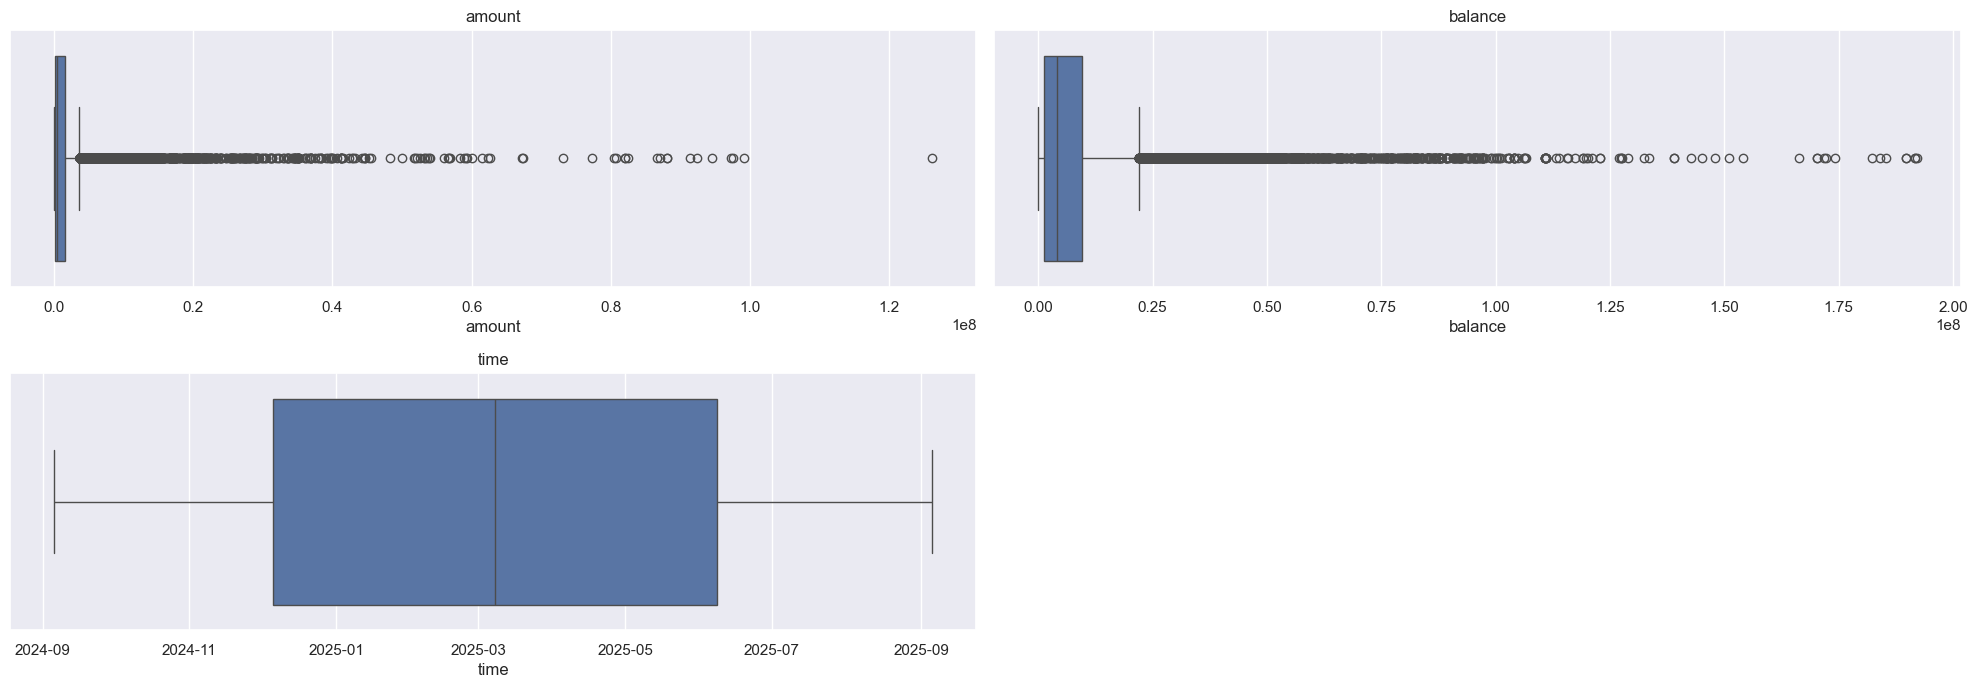

In [81]:
# Using the boxplot to visual the spread of the numeric data
columns = df_regular.describe().columns
analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.ceil(len(columns))), 2, x[0] + 1)

        # Set the title of the Plot
        and plt.title(x[1])

        # Visualize the spread of the features
        and sns.boxplot(data=df_regular, x=x[1])

        # Set the label of the x-axis
        and plt.xlabel(x[1]),
    columns=columns,
    figsize=(20, 10)
)

Thanks to the visualization, we can now understand the data more.

- Can you sense the relationship between `balance` and `amount` too? They both have a lot of outliers and have similar spread.

We need to reduce these outliers so our model will be able to understand the data alot better.

The method we will be using for the reduction is IQR, so this way we can remove the noice and keep most of the relatively normal data.

I wonder how much data we will have to let go of.
Let's create a special function for this.

We will focus on the duo with most outliers, `amount` and `balance`.

In [82]:
df_outliers_reduced = analyst.remove_outliers(df_regular, ['amount', 'balance'], 2)

In [83]:
print(f'Length before outlier reduction: {len(df_regular)}')
print(f'Length after outlier reduction: {len(df_outliers_reduced)}')
print(f'Outliers removed: {len(df_regular) - len(df_outliers_reduced)}')

Length before outlier reduction: 23449
Length after outlier reduction: 20107
Outliers removed: 3342


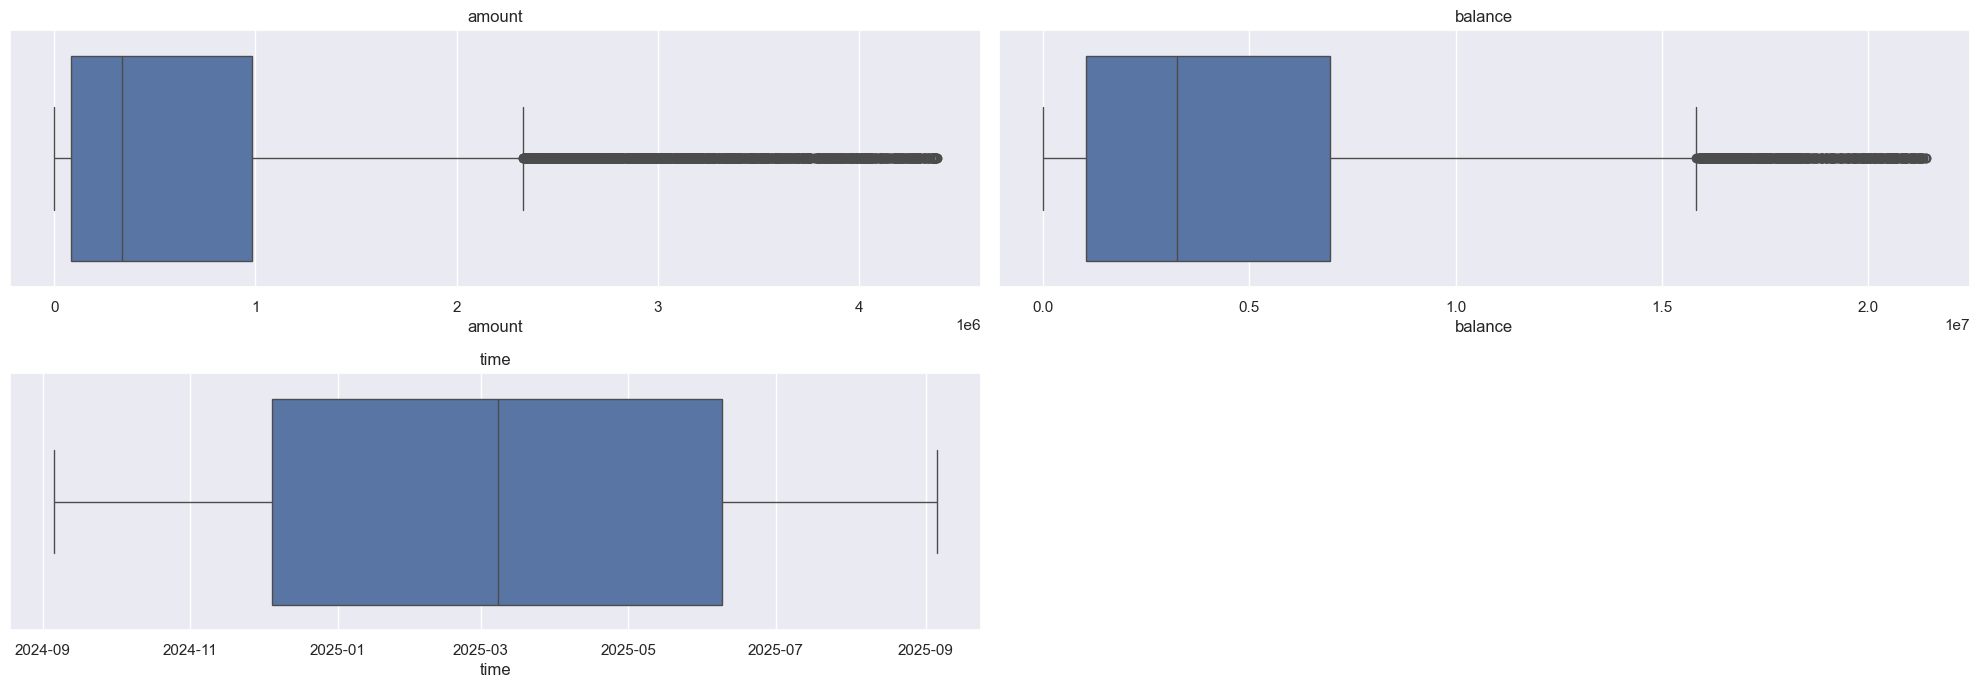

In [84]:
# Let's visualize the data again now the outliers has been removed
columns = df_outliers_reduced.describe().columns
analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.ceil(len(columns))), 2, x[0] + 1)

        # Set the title of the Plot
        and plt.title(x[1])

        # Visualize the spread of the features
        and sns.boxplot(data=df_outliers_reduced, x=x[1])

        # Set the label of the x-axis
        and plt.xlabel(x[1]),
    columns=columns,
    figsize=(20, 10)
)

No that is better, our outliers has been reduced in balance and amount. We will be ignoring the rest of the outliers for now.

## Exploratory Analysis

Lets get to understand our data.

- Summary Statistics
- Correlation of Features
- Distribution of Data
- Spread of Data
- Trend Analysis 


In [85]:
# Before we begin, let's name our df properly
df_eda = df_outliers_reduced.copy()

#### Extracting Periodic features

Let's feed another curiousity we have been holding. When did most transactions occur at?

To do this we will have to extract the hour, day and month feature ealier than expected.

In [86]:
# Extracting the hour
df_eda['hour'] = df_eda['time'].dt.hour.astype(str).str.zfill(2)

# Extracting the day
df_eda['week_day'] = df_eda['time'].dt.day_name()

# Extracting the month
df_eda['month'] = df_eda['time'].dt.month_name()

# Extracting the date
df_eda['date'] = df_eda['time'].dt.date

# Extracting the month day
df_eda['month_day'] = df_eda['time'].dt.day.astype('object')

### Summary Statistics

In [87]:
# Let's take another look at the summary statistics
df_eda.describe()

amount     balance                           time
count   20107.00    20107.00                          20107
mean   729909.37  4738362.14  2025-03-07 23:15:17.922012160
min        10.54      780.04     2024-09-05 17:06:51.464410
25%     82454.17  1035307.35  2024-12-04 22:31:55.464410112
50%    336820.77  3256040.83  2025-03-08 07:13:01.464410112
75%    981545.97  6951339.50  2025-06-08 16:53:23.464410112
max   4385871.67 21397844.09     2025-09-05 15:51:42.464410
std    938323.88  4714739.86                            NaN

In [88]:
# Let's take a look at the statistics of the categorical features.
df_eda.describe(include=['object', 'bool'])

holder         holder_bvn holder_bank     related related_bvn  \
count            20107              20107       20107       20107       20107   
unique             782                762           1        9695        6522   
top     ACC_0000000432  USER_000000000410  BANK_00003  BANK_00003  BANK_00003   
freq               122                140       20107        2595        2595   

       related_bank    state  latitude longitude   status  ...  \
count         20107    20107     20107     20107    20107  ...   
unique           50       37       185       185        2  ...   
top      BANK_00003  Katsina  7.365585  4.041368  SUCCESS  ...   
freq           2949      888       317       317    17111  ...   

                device                  nonce reported    kyc merchant   hour  \
count            20107                  20107    20107  20107    20107  20107   
unique            7879                  18759        2      4        2     24   
top     ATM_0000000050  977748314425326493232    False      2    False     17   
freq               186                      4    16856   6863    18239    886   

        week_day  month        date month_day  
count      20107  20107       20107     20107  
unique         7     12         366        31  
top     Saturday   July  2024-11-28        28  
freq        2927   1795          85       715  

[4 rows x 23 columns]

Things that stand out in this summary.

- There are `3128` different accounts that transacted within the time of this transactions.

- All these `3128` accounts belong to only `2735` users, some users own multiple accounts.

- There are `50` related banks, which corresponds to the total number of banks in the simulation.

- There are `6` categories of tranactions that fall under the `2` types of transactions (Debit/Credit)

- A total of `15942` devices where also used accross `3` channels were used.

- There were `75252` related transactions based on the unique `nonce` in the dataset.

- The transaction spans accross `37` unique states, suggesting it is all accross Nigeria.

- The most transactions took place in `Yobe`. (Ballers 💰). Is the there a hotspot there?

- The most frequent type and category of transactions are DEBIT and WITHDRAWAL respectively. Could there be more outflow than inflow?

- Most transactions were not reported, we will see the proportion later in this notebook.

- `October` is the most frequent month, though the day with most transactions is in `April` on `2025-04-06`

- `Month` day of `21` has the most frequent transactions.

- There is only 1 holder bank, `Mara Bank` so we will drop the column

- Most users are of `KYC` leve of `2`.

- `Tuesday` is the most active day of the week.

In [89]:
df_eda.drop(columns='holder_bank', inplace=True)

### Correlations

Before we continue on our exploration, let's ask a vital question early.

- Do our `data` points have any form of `relationship` with each other.

- If they do, what could be the `reason` for that relationship to exist?

##### Correlation of all features

Let's see how all our features are correlating with one another.

To do this we need to encode the categorical/discrete features.

In [90]:
df_eda.dtypes

amount                 float64
balance                float64
time            datetime64[ns]
holder                  object
holder_bvn              object
related                 object
related_bvn             object
related_bank            object
state                   object
latitude                object
longitude               object
status                  object
type                    object
category                object
channel                 object
device                  object
nonce                   object
reported                  bool
kyc                     object
merchant                  bool
hour                    object
week_day                object
month                   object
date                    object
month_day               object
dtype: object

Latitude and Longitude are numberical, however they are actually discrete variables, hence we will encode them before correlating.

Also, time is a date variable which is an ordinal and will be treated as a continious variable.

Hence our continious variables include `time`, `amount`, `balance`

##### Let's encode the discrete features so we can correlate them with other features.

We will be using a special function for this.

In [91]:
# Get the discrete features
discrete_features = df_eda.select_dtypes(include=['object', 'bool']).columns.tolist()
discrete_features

['holder',
 'holder_bvn',
 'related',
 'related_bvn',
 'related_bank',
 'state',
 'latitude',
 'longitude',
 'status',
 'type',
 'category',
 'channel',
 'device',
 'nonce',
 'reported',
 'kyc',
 'merchant',
 'hour',
 'week_day',
 'month',
 'date',
 'month_day']

In [92]:
# Encode the discrete features
df_corr = engineer.encoder(df_eda, discrete_features)

# Concatinate the encoded discrete features with the non discrete features
df_corr = pd.concat([df_eda[['amount', 'balance', 'time']], df_corr], axis=1)
df_corr

amount    balance                       time  holder  holder_bvn  \
74850   53783.89   53783.89 2024-09-05 17:06:51.464410       0           3   
74851  888853.01  888853.01 2024-09-05 17:07:03.464410       1           6   
74853 1237454.53 1237454.53 2024-09-05 17:10:31.464410       3          16   
74854  388078.27  388078.27 2024-09-05 17:13:22.464410       4          23   
74855  947016.81  947016.81 2024-09-05 17:15:21.464410       5          25   
...          ...        ...                        ...     ...         ...   
98291   31762.12  486924.02 2025-09-05 13:49:25.464410     733         737   
98294  198466.46  223155.39 2025-09-05 14:49:59.464410     656         694   
98295 1447974.52 5339667.48 2025-09-05 15:48:04.464410     537         102   
98296  155963.22  486624.15 2025-09-05 15:49:01.464410     390         166   
98297 3088949.83 8212443.00 2025-09-05 15:51:42.464410     258         427   

       related  related_bvn  related_bank  state  latitude  ...  device  \
74850     9694           93             3     17         0  ...     120   
74851     9694           93             3      6        40  ...     123   
74853     9694           93             3     19        50  ...     203   
74854     9694           93             3     26        93  ...     252   
74855     9694           93             3     17         0  ...     292   
...        ...          ...           ...    ...       ...  ...     ...   
98291     9665           64            34      0       167  ...      64   
98294     6361         4683            25      7       181  ...    7274   
98295     9660           59            30     21       115  ...      59   
98296     7178         2683            21     29       130  ...      51   
98297     2235         1029            35      9       153  ...    4029   

       nonce  reported  kyc  merchant  hour  week_day  month  date  month_day  
74850   1656         0    0         0    17         4     11     0          4  
74851  10355         0    1         0    17         4     11     0          4  
74853   2660         0    2         0    17         4     11     0          4  
74854   8654         0    1         1    17         4     11     0          4  
74855   9625         0    1         1    17         4     11     0          4  
...      ...       ...  ...       ...   ...       ...    ...   ...        ...  
98291   4717         0    1         0    13         0     11   365          4  
98294   9184         0    1         0    14         0     11   365          4  
98295   9058         1    2         0    15         0     11   365          4  
98296   4363         0    1         0    15         0     11   365          4  
98297   3014         0    2         0    15         0     11   365          4  

[20107 rows x 25 columns]

In [93]:
# Correlate the features with each other
corr_matrix = df_corr.corr(method='pearson')
corr_matrix

amount  balance  time  holder  holder_bvn  related  related_bvn  \
amount          1.00     0.42  0.03   -0.08       -0.04    -0.02        -0.00   
balance         0.42     1.00  0.03   -0.20       -0.11    -0.01         0.03   
time            0.03     0.03  1.00    0.67        0.49     0.36         0.30   
holder         -0.08    -0.20  0.67    1.00        0.70     0.26         0.16   
holder_bvn     -0.04    -0.11  0.49    0.70        1.00     0.21         0.13   
related        -0.02    -0.01  0.36    0.26        0.21     1.00        -0.07   
related_bvn    -0.00     0.03  0.30    0.16        0.13    -0.07         1.00   
related_bank    0.01     0.02 -0.00   -0.04       -0.04    -0.19         0.15   
state          -0.01     0.00 -0.02   -0.02       -0.01    -0.02         0.00   
latitude        0.02     0.01 -0.01   -0.02        0.02     0.02        -0.02   
longitude      -0.01    -0.01 -0.01   -0.00       -0.00     0.00        -0.01   
status          0.00     0.00 -0.00    0.01        0.01     0.04        -0.05   
type            0.01    -0.09  0.00   -0.03       -0.03    -0.14         0.12   
category        0.01    -0.08 -0.00    0.00       -0.00     0.01        -0.01   
channel         0.00     0.01 -0.00   -0.04       -0.02     0.05        -0.03   
device          0.01    -0.00  0.32    0.26        0.22     0.01         0.23   
nonce          -0.02    -0.01 -0.00   -0.00        0.00    -0.01         0.01   
reported       -0.00     0.02 -0.01   -0.02       -0.02     0.00        -0.01   
kyc             0.14     0.27 -0.00   -0.04       -0.02    -0.00         0.01   
merchant       -0.03    -0.03 -0.01   -0.00        0.01     0.01        -0.01   
hour            0.00     0.01 -0.01    0.00       -0.00    -0.01         0.02   
week_day        0.02     0.01  0.03    0.01        0.01     0.01         0.01   
month          -0.04    -0.04 -0.48   -0.31       -0.26    -0.19        -0.17   
date            0.03     0.03  1.00    0.67        0.49     0.36         0.30   
month_day      -0.01    -0.01  0.02    0.02        0.02     0.01        -0.00   

              related_bank  state  latitude  ...  device  nonce  reported  \
amount                0.01  -0.01      0.02  ...    0.01  -0.02     -0.00   
balance               0.02   0.00      0.01  ...   -0.00  -0.01      0.02   
time                 -0.00  -0.02     -0.01  ...    0.32  -0.00     -0.01   
holder               -0.04  -0.02     -0.02  ...    0.26  -0.00     -0.02   
holder_bvn           -0.04  -0.01      0.02  ...    0.22   0.00     -0.02   
related              -0.19  -0.02      0.02  ...    0.01  -0.01      0.00   
related_bvn           0.15   0.00     -0.02  ...    0.23   0.01     -0.01   
related_bank          1.00   0.02     -0.02  ...   -0.13  -0.00     -0.00   
state                 0.02   1.00     -0.01  ...    0.02   0.00     -0.00   
latitude             -0.02  -0.01      1.00  ...   -0.08  -0.01     -0.00   
longitude             0.01  -0.05     -0.12  ...   -0.03  -0.00      0.00   
status               -0.07  -0.00     -0.01  ...    0.05  -0.00      0.18   
type                  0.18   0.00      0.03  ...   -0.11  -0.00     -0.07   
category              0.09   0.00      0.00  ...    0.06   0.01     -0.05   
channel               0.09  -0.01      0.05  ...   -0.28  -0.00      0.00   
device               -0.13   0.02     -0.08  ...    1.00   0.01     -0.01   
nonce                -0.00   0.00     -0.01  ...    0.01   1.00      0.01   
reported             -0.00  -0.00     -0.00  ...   -0.01   0.01      1.00   
kyc                   0.01  -0.04      0.01  ...   -0.02   0.00      0.01   
merchant              0.01   0.01     -0.05  ...   -0.01  -0.01      0.01   
hour                 -0.00  -0.00     -0.01  ...   -0.01  -0.01      0.01   
week_day             -0.00  -0.00      0.00  ...    0.01   0.01     -0.00   
month                 0.00   0.00     -0.01  ...   -0.17   0.02     -0.00   
date                 -0.00  -0.02     -0.01  ...    0.32  -

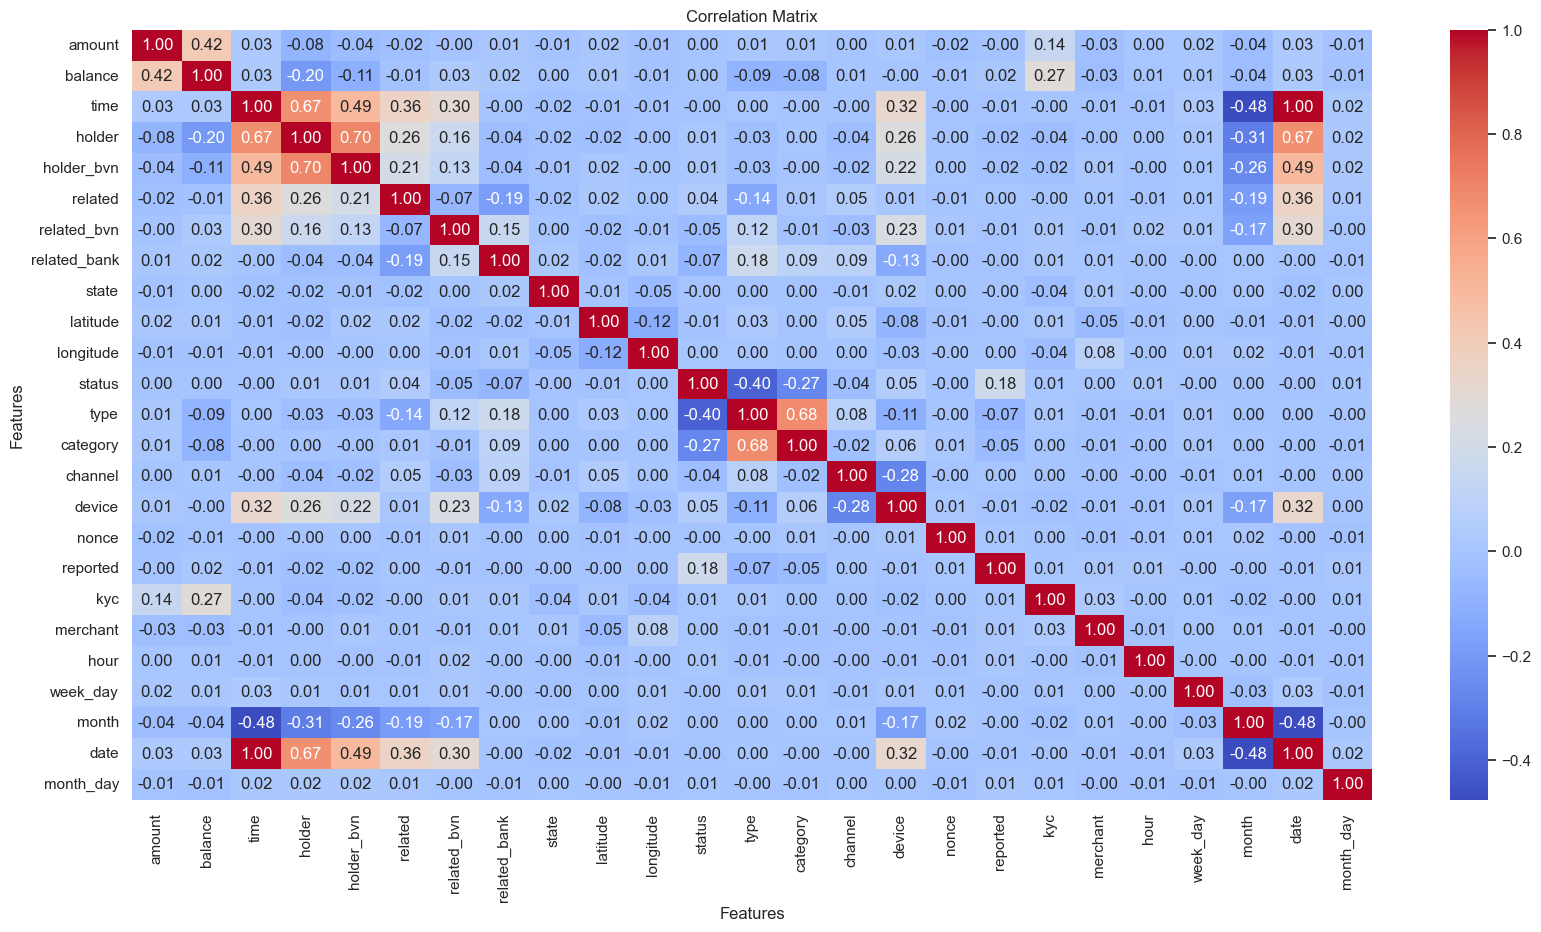

In [94]:
# Plot confusion matrix 
plt.figure(figsize=(20, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Observations:

- Strong positive correlation between amount and balance suggests transaction values drive balances.

- time and date correlates well with the user features like holder, related, related_bvn, and holder_bvn hinting at potential redundancy or leakage.

- Negative correlation between month and time (-0.55) suggests seasonality impacts transaction timing.

- type and category show a strong positive correlation (0.58), implying categories belong to different types.

- Device usage (device) correlates moderately with time (0.27), useful for time-device fraud detection.

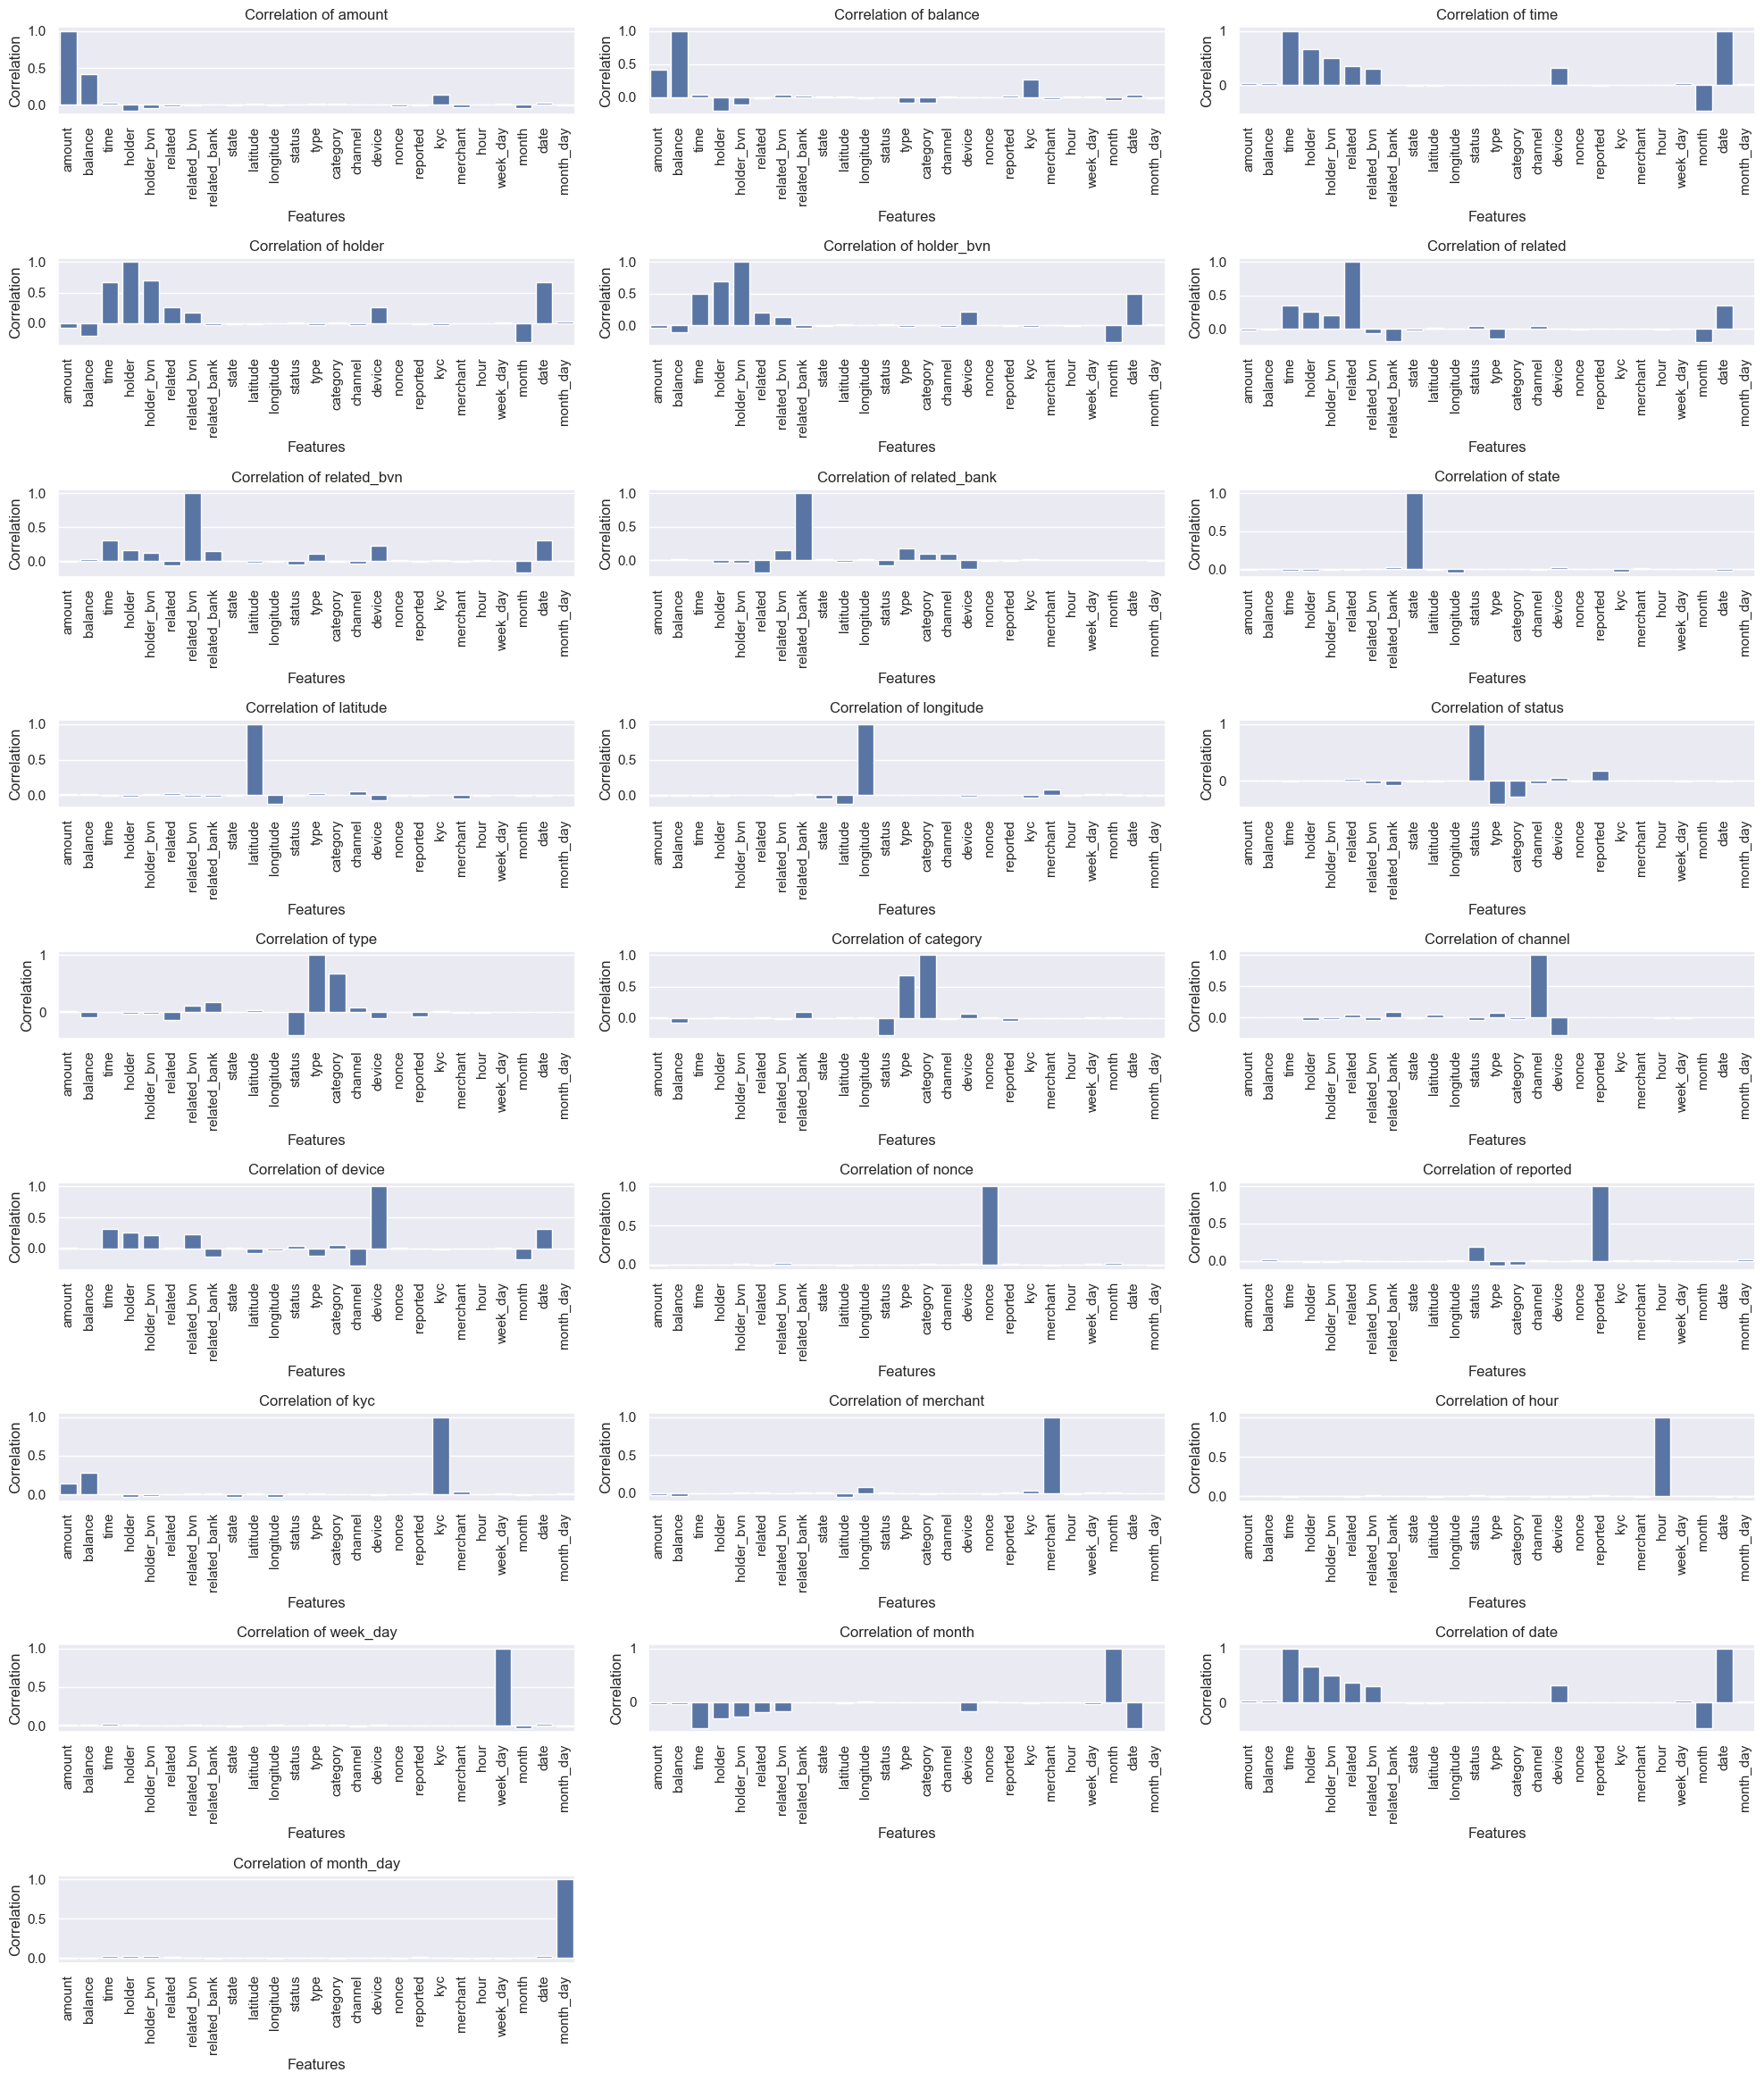

In [95]:
# Plot the correlation matrix
analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.floor(len(corr_matrix.columns)/2)), 3, x[0] + 1)

        # Visualize the correlation of the features
        and sns.barplot(data=corr_matrix, x=corr_matrix.index, y=x[1])

        # Set the plot title
        and plt.title(f'Correlation of {x[1]}')

        # Set x lable
        and plt.xlabel('Features')

        # Set y lable
        and plt.ylabel('Correlation')
        
        and plt.tick_params(axis='x', rotation=90),

    # Set the figsize
    figsize=(20, 30),
    columns=corr_matrix.columns,
)

Visualizing the correlations, things are getting a lot more clearer.

We will now prioritize highly correlated features.

In [96]:
interesting_correlation = analyst.bounded_correlation(corr_matrix)

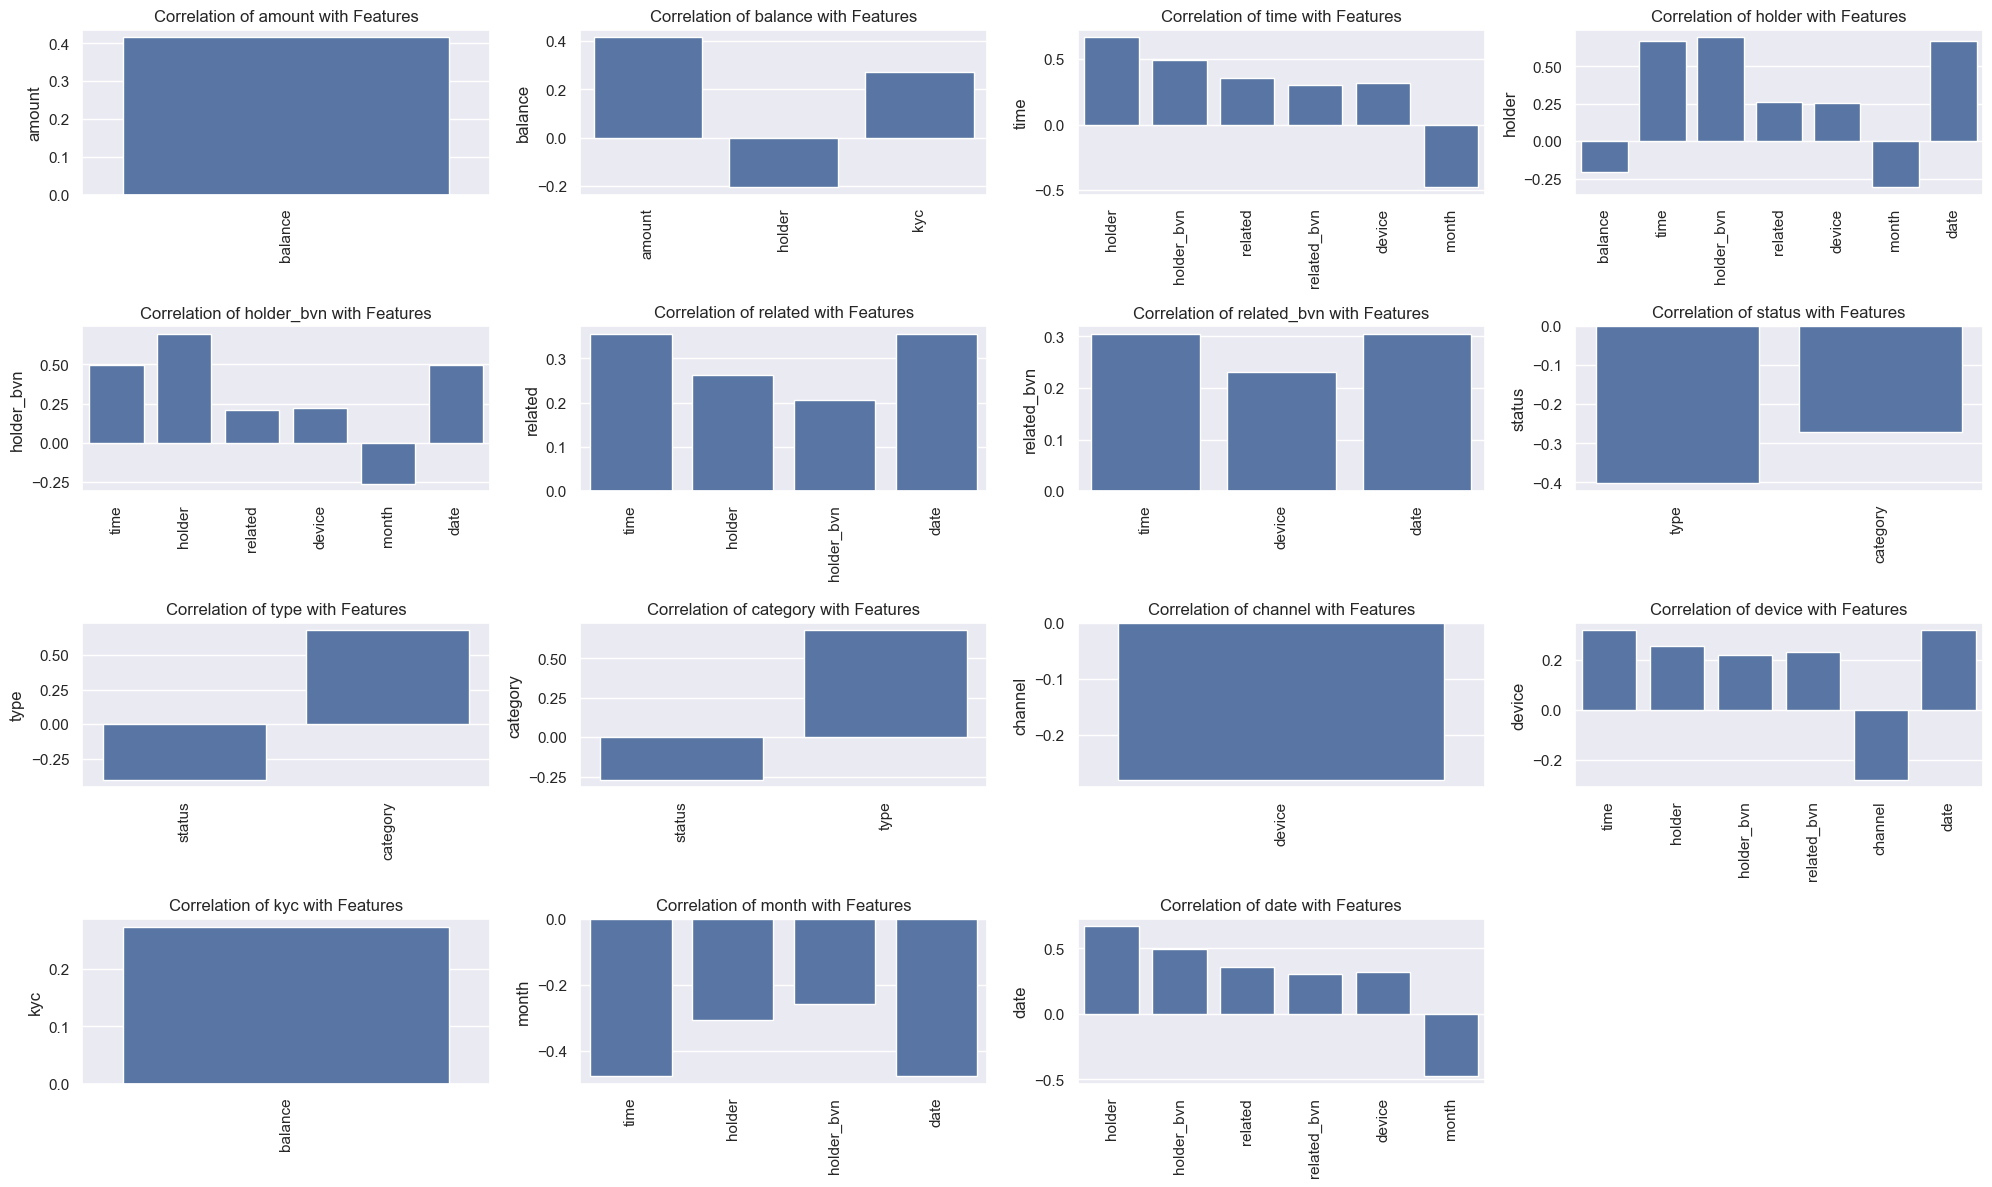

In [97]:
analyst.plot_bounded_correlation(interesting_correlation)

Nice, now we have the correlations that we are interested in, what do we see?

- `Amount` and `Balance`: Show very strong mutual positive correlation.

- `Holder` & `Holder BVN`: Both highly correlate positively with `time` and `date`.

- `Related` & `Related BVN`: Exhibit a very strong positive correlation with each other.

- `Status` & `Type`: Are notably correlated, especially with `category`.

- `Device` & `Month`: Consistently show minimal to weak correlations overall.

Let's get the distribution of features with there correlation with other features

In [98]:
# Get the correlations within out threshold
valued_correlations = analyst.bounded_correlation(corr_matrix)

# Count and sum the correlations of each feature
valued_correlations_count = {x: {'count': len(valued_correlations[x]), 'sum': sum(abs(valued_correlations[x]))} for x in valued_correlations}

# Convert it to a dataframe
valued_corr_df = pd.DataFrame(valued_correlations_count).transpose().sort_values(by='count', ascending=False).reset_index(names='feature')

valued_corr_df

feature  count  sum
0        holder   7.00 3.06
1          time   6.00 2.62
2    holder_bvn   6.00 2.37
3        device   6.00 1.62
4          date   6.00 2.62
5       related   4.00 1.18
6         month   4.00 1.52
7       balance   3.00 0.89
8   related_bvn   3.00 0.84
9        status   2.00 0.67
10         type   2.00 1.08
11     category   2.00 0.95
12       amount   1.00 0.42
13      channel   1.00 0.28
14          kyc   1.00 0.27

<Axes: title={'center': 'Correlation Strength'}, xlabel='count', ylabel='sum'>

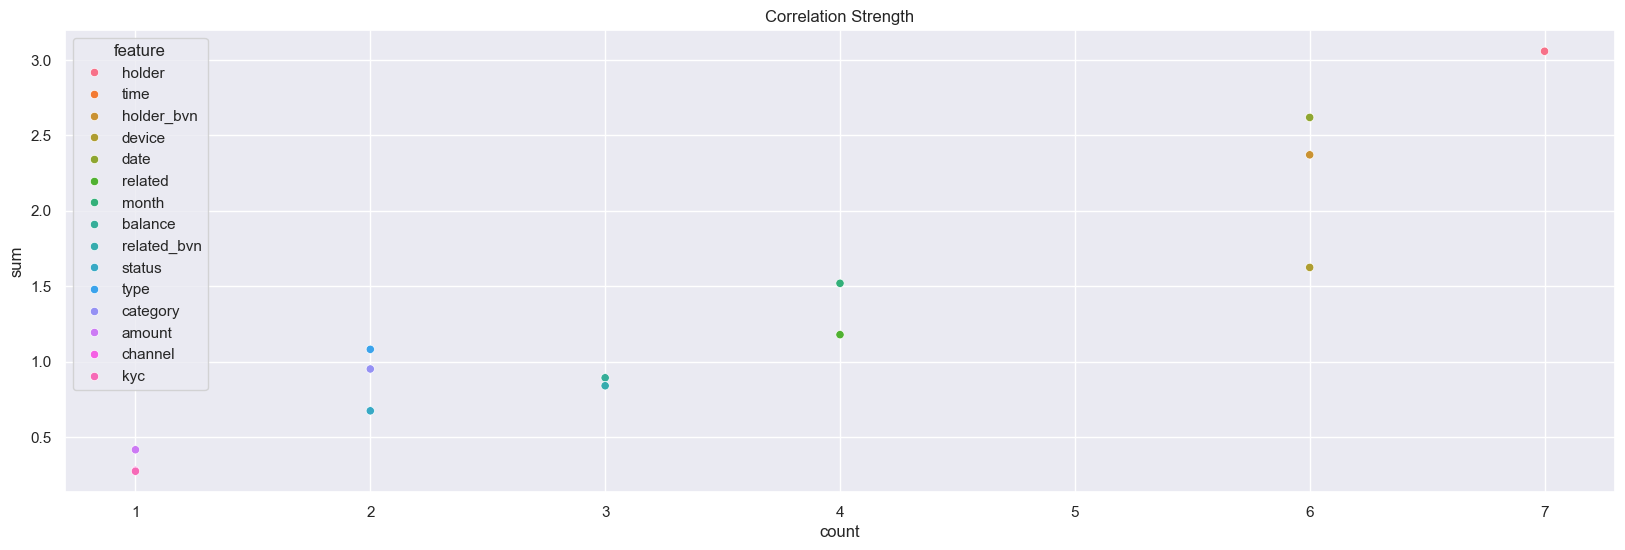

In [99]:
# Visualize the the correlations
plt.figure(figsize=(20, 6))
plt.title('Correlation Strength')
sns.scatterplot(data=valued_corr_df, x='count', y='sum', hue='feature')

Things that stand out from this plot:

- Strongest Correlations: Features `holder`, `time`, `holder_bvn`, `month`, and `date` show the highest correlations at count 6 with `holder` at 7 as the strongest.

- Weakest Correlations: `Amount` and `category` consistently exhibit very low correlation strength across all counts.

- Variable Correlation Strength: Most features display varying correlation strengths depending on the `count` value.

- Increasing Count, Increasing Strength: For the most correlated features, strength generally increases with higher `count`.

- Outliers in Correlation: `Related` and `related_bvn` show moderate correlation at count 5, unlike others at higher counts.

### Distribution of Data

Let's visualize the distibution of the continious and discrete features

#### General View

Let's look at our data from the outside to the inside, this will enable use get a better understanding.

In [100]:
# Let's see the details of our dataset to choose the columns to visualize
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20107 entries, 74850 to 98297
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   amount        20107 non-null  float64       
 1   balance       20107 non-null  float64       
 2   time          20107 non-null  datetime64[ns]
 3   holder        20107 non-null  object        
 4   holder_bvn    20107 non-null  object        
 5   related       20107 non-null  object        
 6   related_bvn   20107 non-null  object        
 7   related_bank  20107 non-null  object        
 8   state         20107 non-null  object        
 9   latitude      20107 non-null  object        
 10  longitude     20107 non-null  object        
 11  status        20107 non-null  object        
 12  type          20107 non-null  object        
 13  category      20107 non-null  object        
 14  channel       20107 non-null  object        
 15  device        20107 non-null  object 

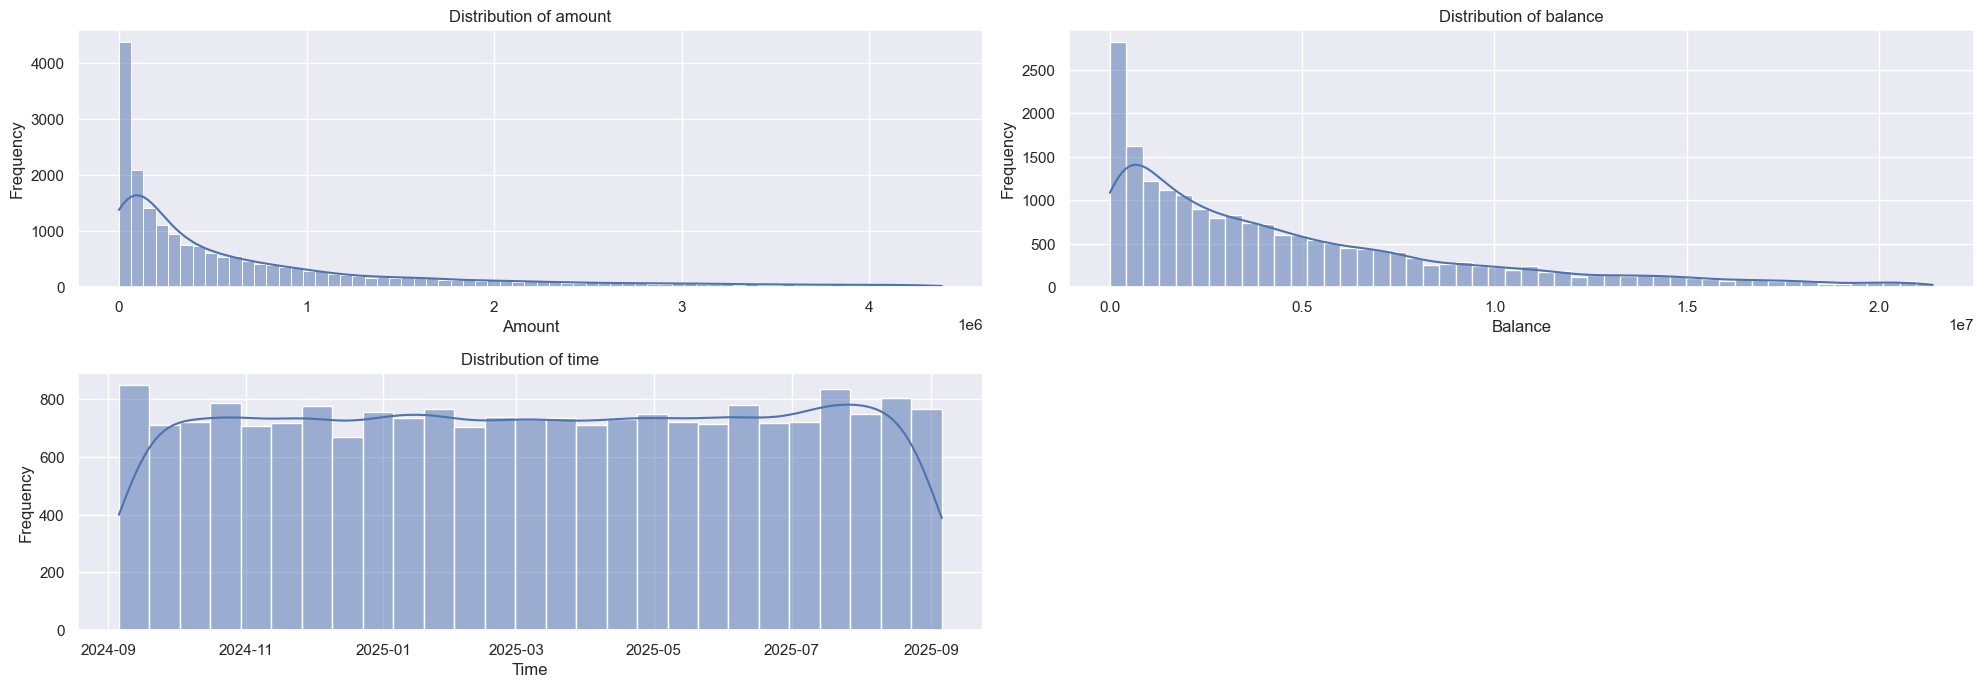

In [101]:
# Visualize the distribution of the continious features.
columns = ['amount', 'balance', 'time']

analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(len(columns), 2, x[0] + 1)

        # Visualize the distribution of the features
        and sns.histplot(data=df_eda, x=x[1], kde=True)

        # Set the plot title
        and plt.title(f'Distribution of {x[1]}')

        # Set X lable
        and plt.xlabel(x[1].capitalize())

        # Set Y lable
        and plt.ylabel('Frequency'),

    # Set the figsize
    figsize=(20, 10),
    columns=columns,
)

Things that stand out.

- `Amount`: Heavily right-skewed; most transactions are for small amounts.

- `Balance`: Right-skewed, similar to amount; many transactions have low balances.

- `Time`: Frequency is relatively uniform across months (2024-2025).

- Both `amount` & `balance` distributions show a sharp drop-off after small values.

- No strong trend or seasonality evident in the time distribution plot.





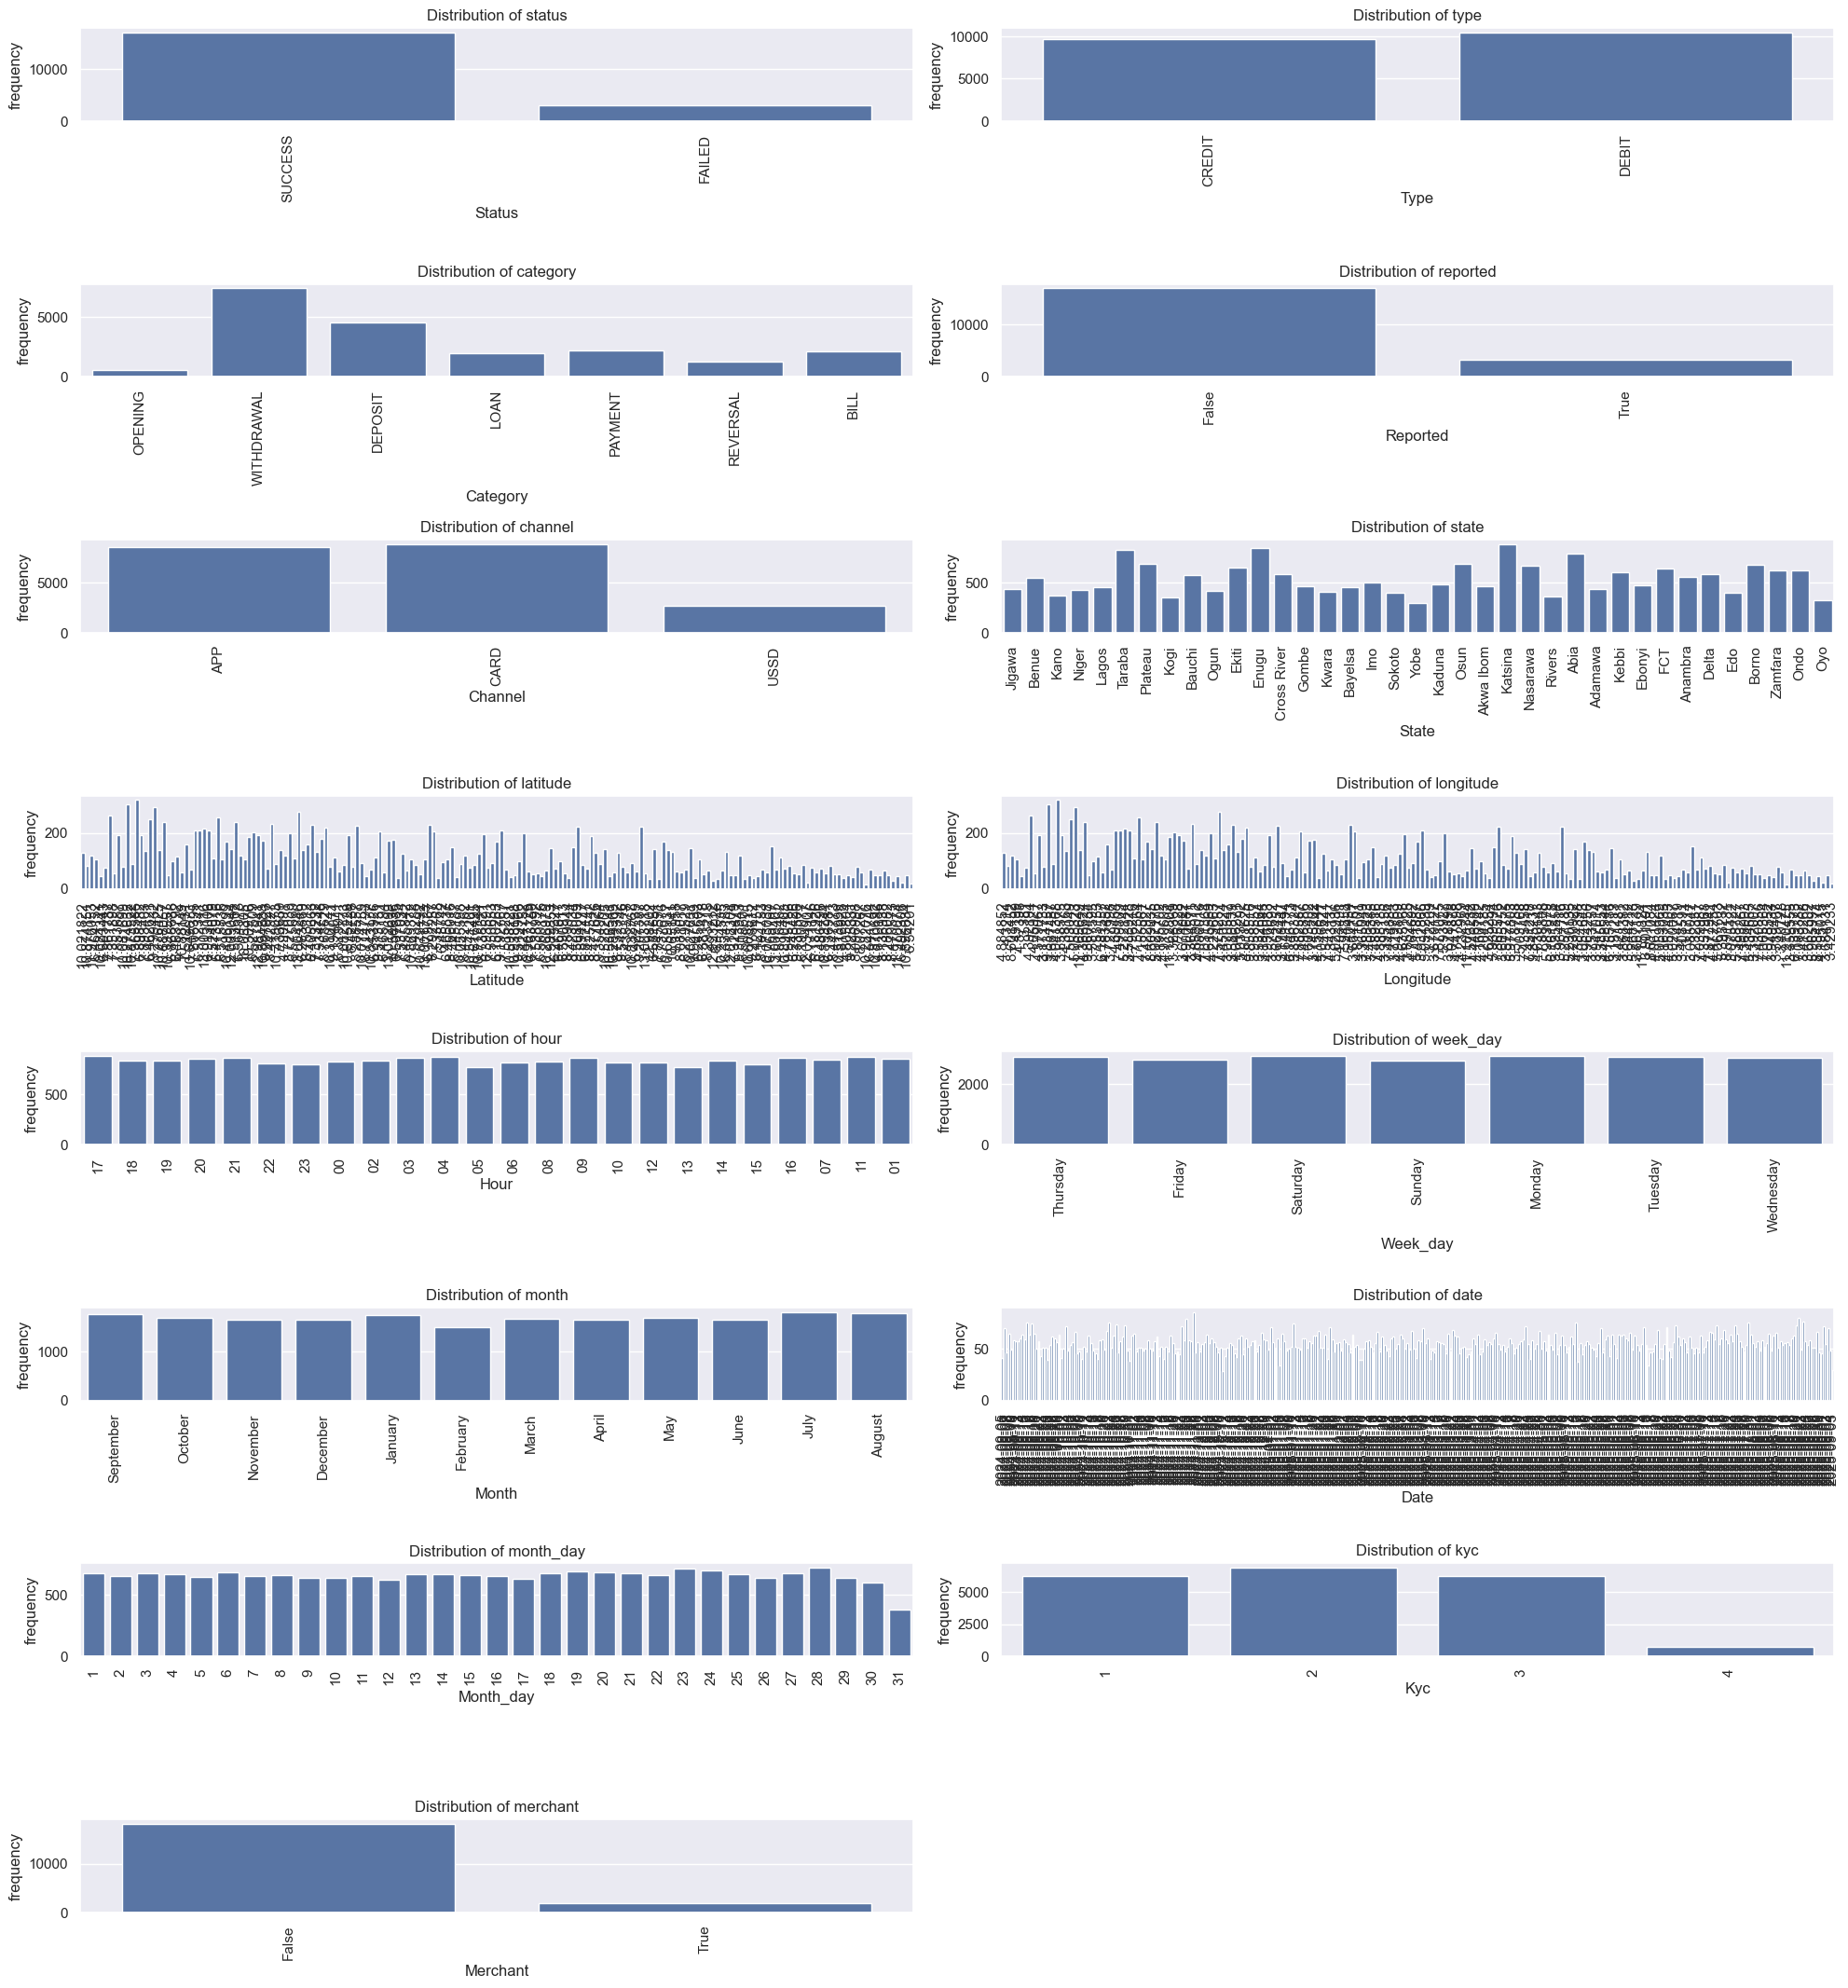

In [102]:
# Visualize the distribution of the discrete features.
columns = [
    'status',
    'type',
    'category',
    'reported',
    'channel',
    'state',
    'latitude',
    'longitude',
    'hour',
    'week_day',
    'month',
    'date',
    'month_day',
    'kyc',
    'merchant'
]

analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.floor(len(columns))), 2, x[0] + 1)

        # Visualize the distribution of the features
        and sns.countplot(data=df_eda, x=x[1])

        # Set the plot title
        and plt.title(f'Distribution of {x[1]}')

        # Set x lable
        and plt.xlabel(x[1].capitalize())

        # Set y lable
        and plt.ylabel('frequency')

        and plt.tick_params(axis='x', rotation=90),

    # Set the figsize
    figsize=(20, 40),
    columns=columns,
)

##### Observations.

- Majority of transactions `succeed`; only a small fraction `fail`, skewing fraud detection toward anomalies.

- `Debits` heavily outnumber `credits`, but withdrawals and reversals show potential fraud-risk categories.

- Most activity comes from card-based `channels`; APP/USSD volumes are small but fraud-prone.

- `Reported` fraud cases are few, creating high class imbalance and challenge for supervised models.

- `KYC` levels are few at level 4; low levels are frequent, signaling very few people could attain the level.



Well, there we have it, there are more outflows than inflows for this through the year.

#### CashFlow

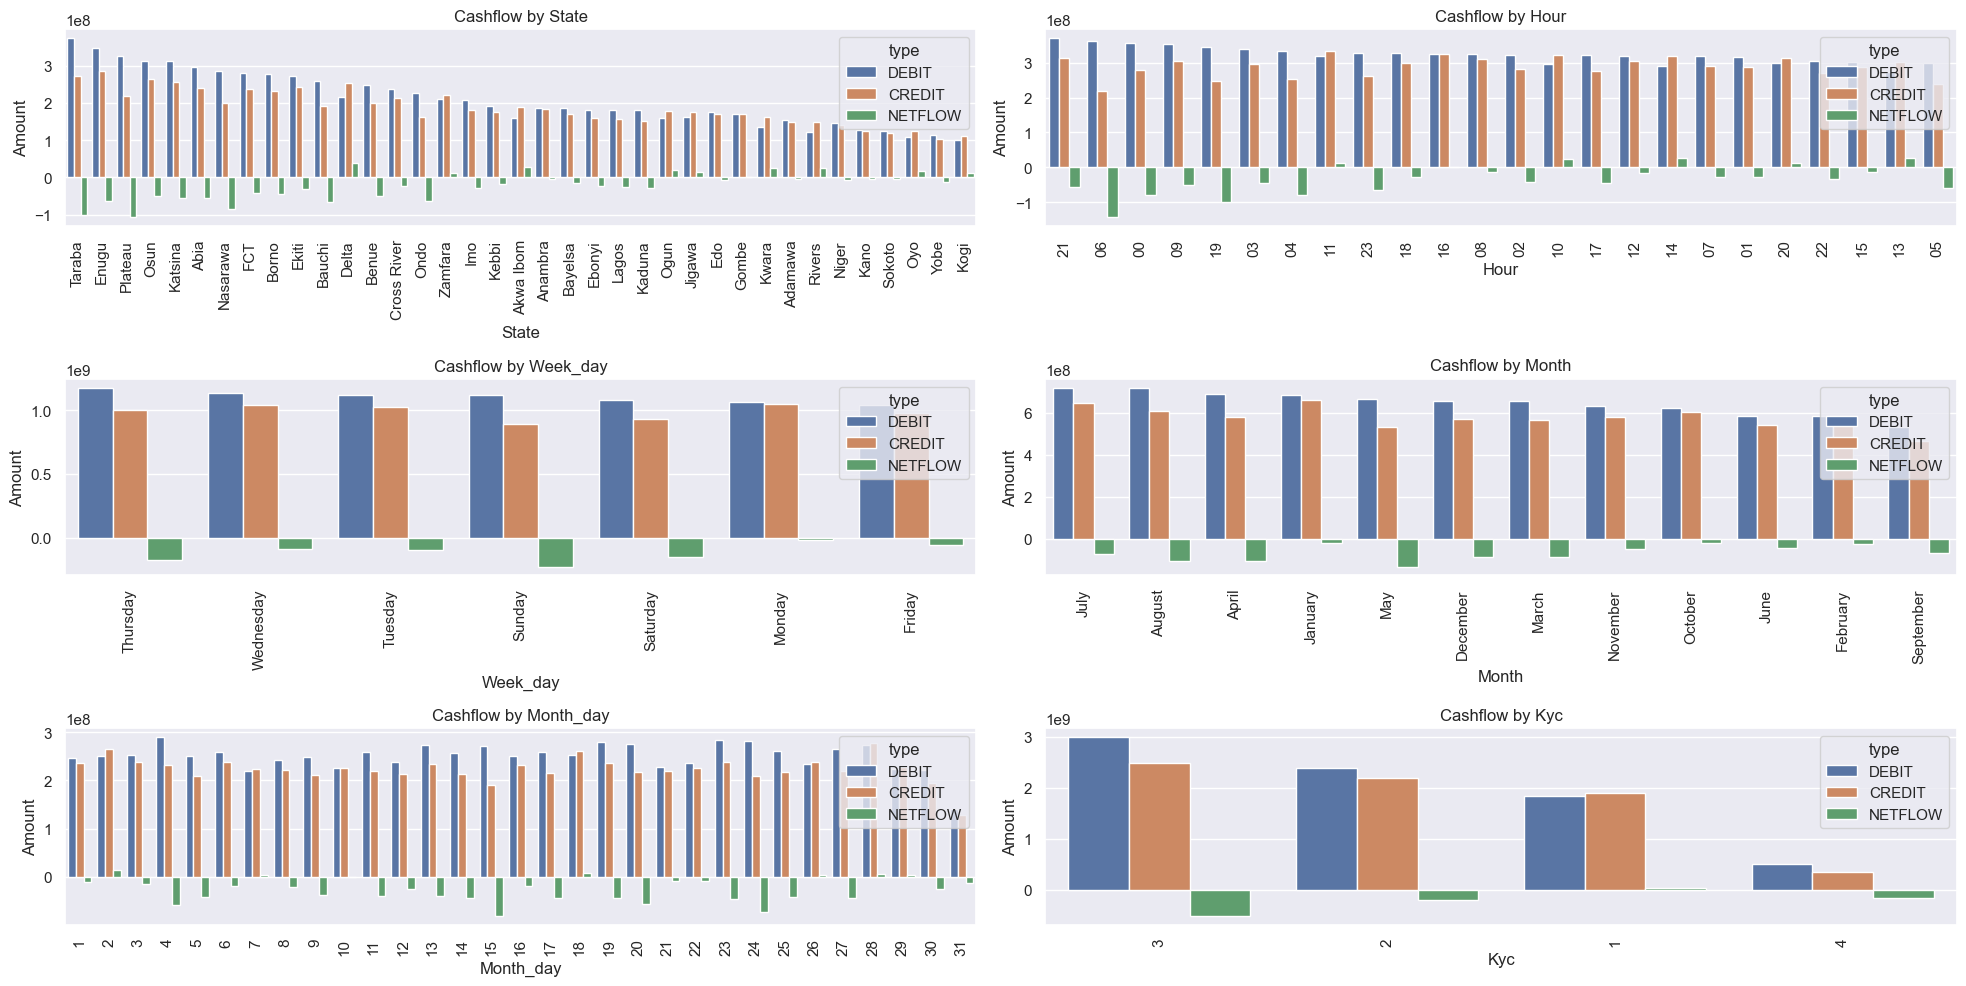

In [103]:
# Plot cashflow
analyst.plot_cashflow(df_eda, ['state', 'hour', 'week_day', 'month', 'month_day', 'kyc'])

Observing this plot, here are the things that stand out.

- Overall negative `netflow` indicates accross all features

- `Cashflow` varies significantly by `state`, with `Kaduna` & `Ogun` showing no `netflows`.

- There is no decline of activities in `week_day`, `month` or `hour`. The is a little fluctuations in `month_day` however.

#### Distribution of features with type

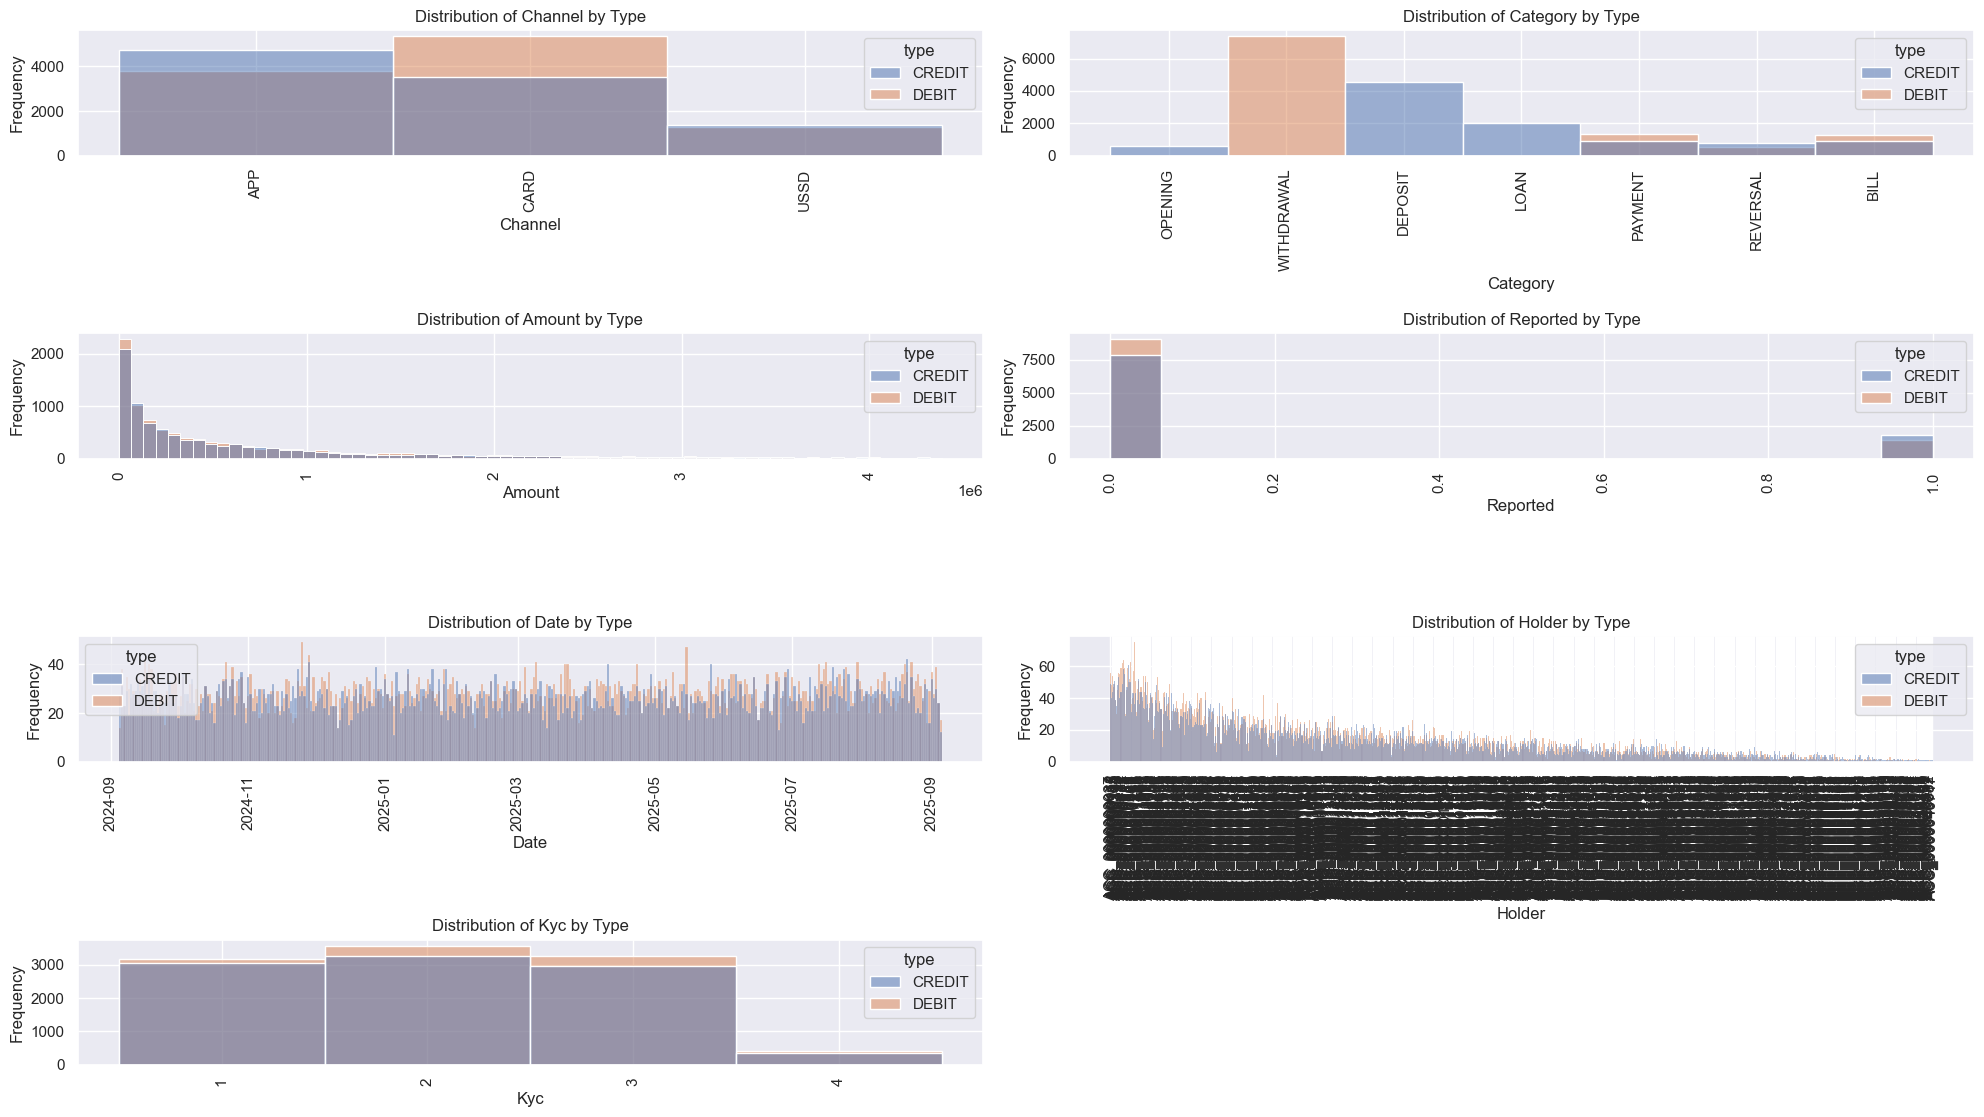

In [104]:
# Plot distribution by type
plt.figure(figsize=(20, 20))
analyst.plot_distribution(df_eda, ['channel', 'category', 'amount', 'reported', 'date', 'holder', 'kyc'], 'type')

Observations:

- There is class inbalance in `category`, it needs the `dimension` to be reduced.

- Accross all features, there is a huge gap in transaction `type`, with `debit` being almost 2x of `credit`.

#### Category Distribution

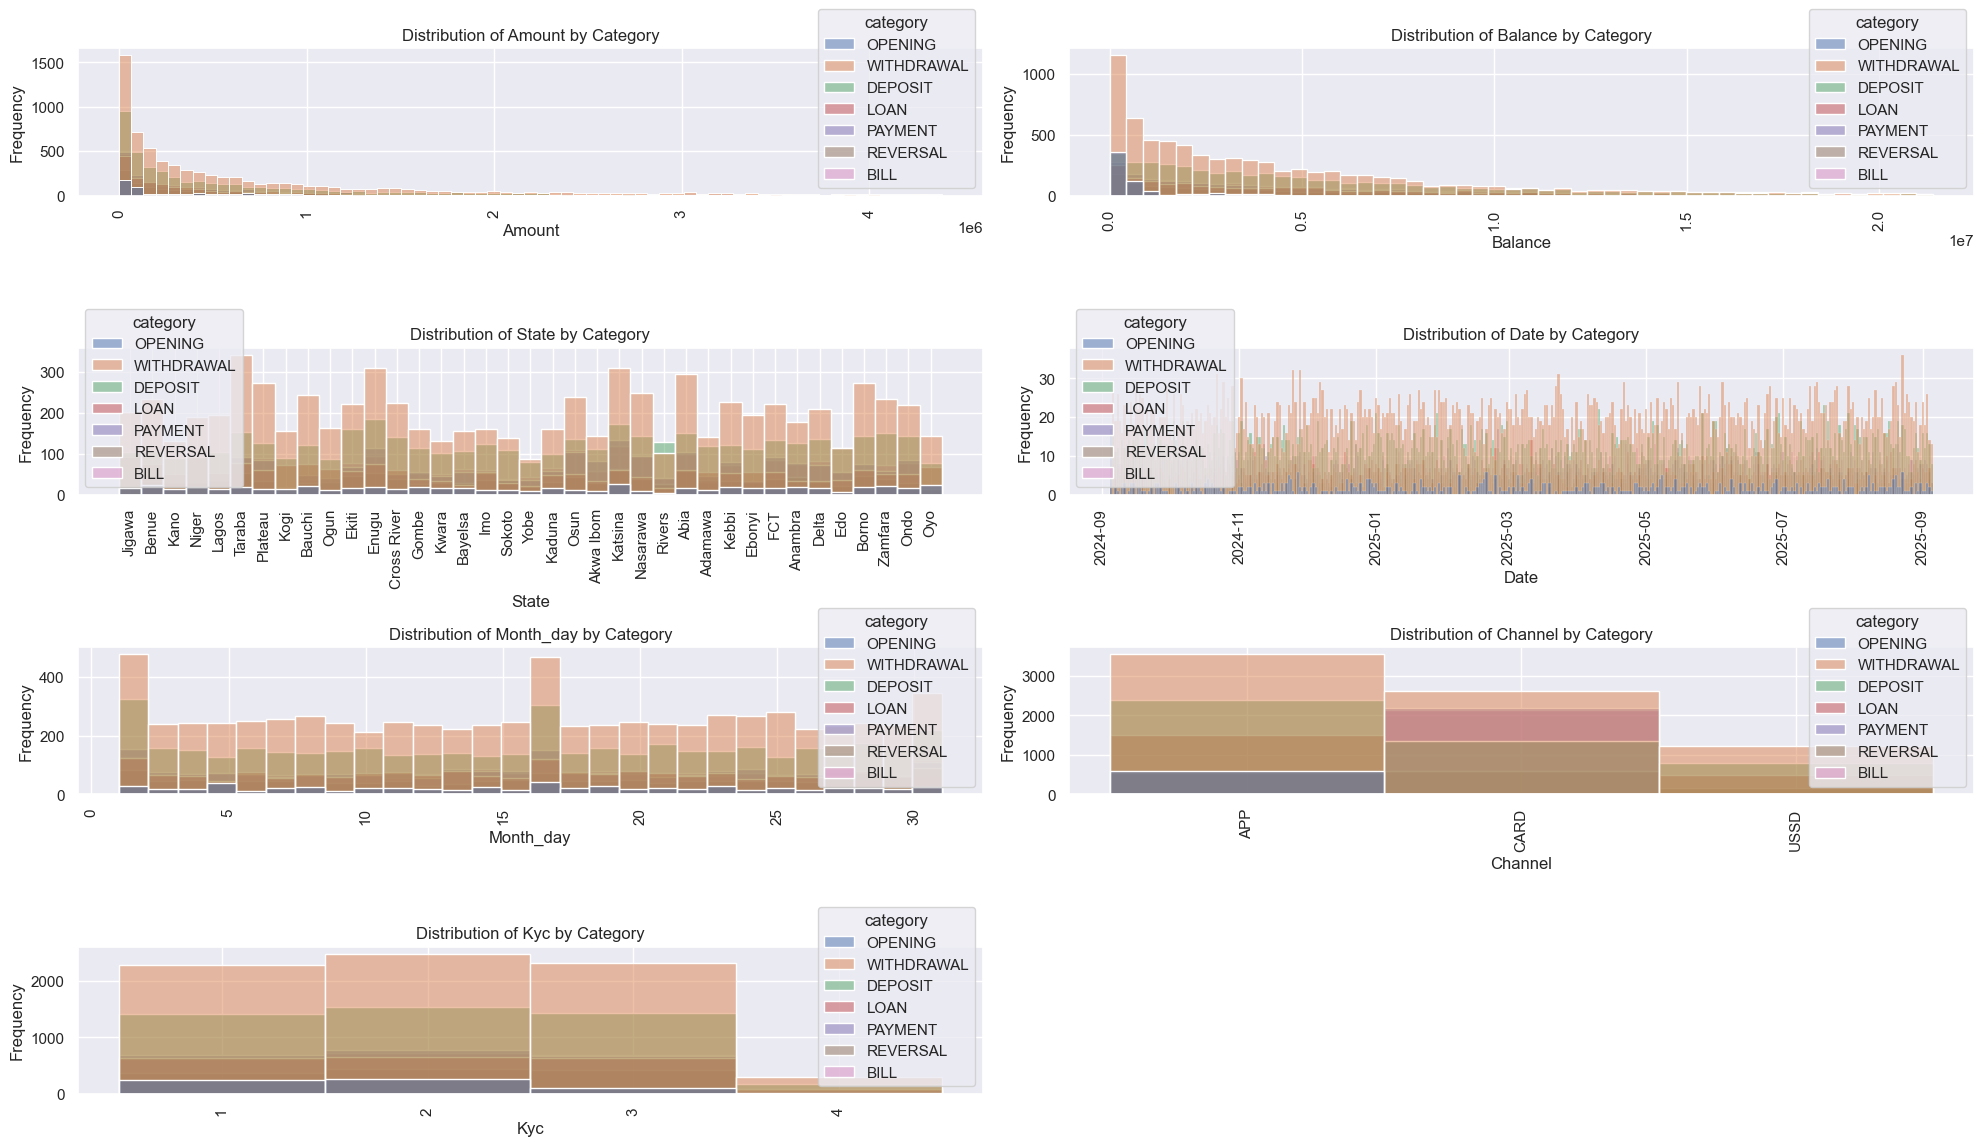

In [105]:
# Plot distribution by category
plt.figure(figsize=(20, 20))
analyst.plot_distribution(df_eda, ['amount', 'balance', 'state', 'date', 'month_day', 'channel', 'kyc'], 'category')

Observations:

- `Amount` and `Balance`: Most transactions, especially withdrawals and deposits, are of low value.

- `Date`: Transaction frequencies show fluctuations over time, with withdrawals and deposits consistently dominant.

- Channel: CARD is the primary channels, with CARD heavily used for withdrawals and deposits. USSD/APP is less utilized.

- State: Transaction volumes vary by state, with Oyo, Yobe, Enugu, and Lagos showing high activity.

- Month Day: Transaction frequencies are relatively consistent throughout the month, with no strong daily patterns for any category.

#### Channel Distribution

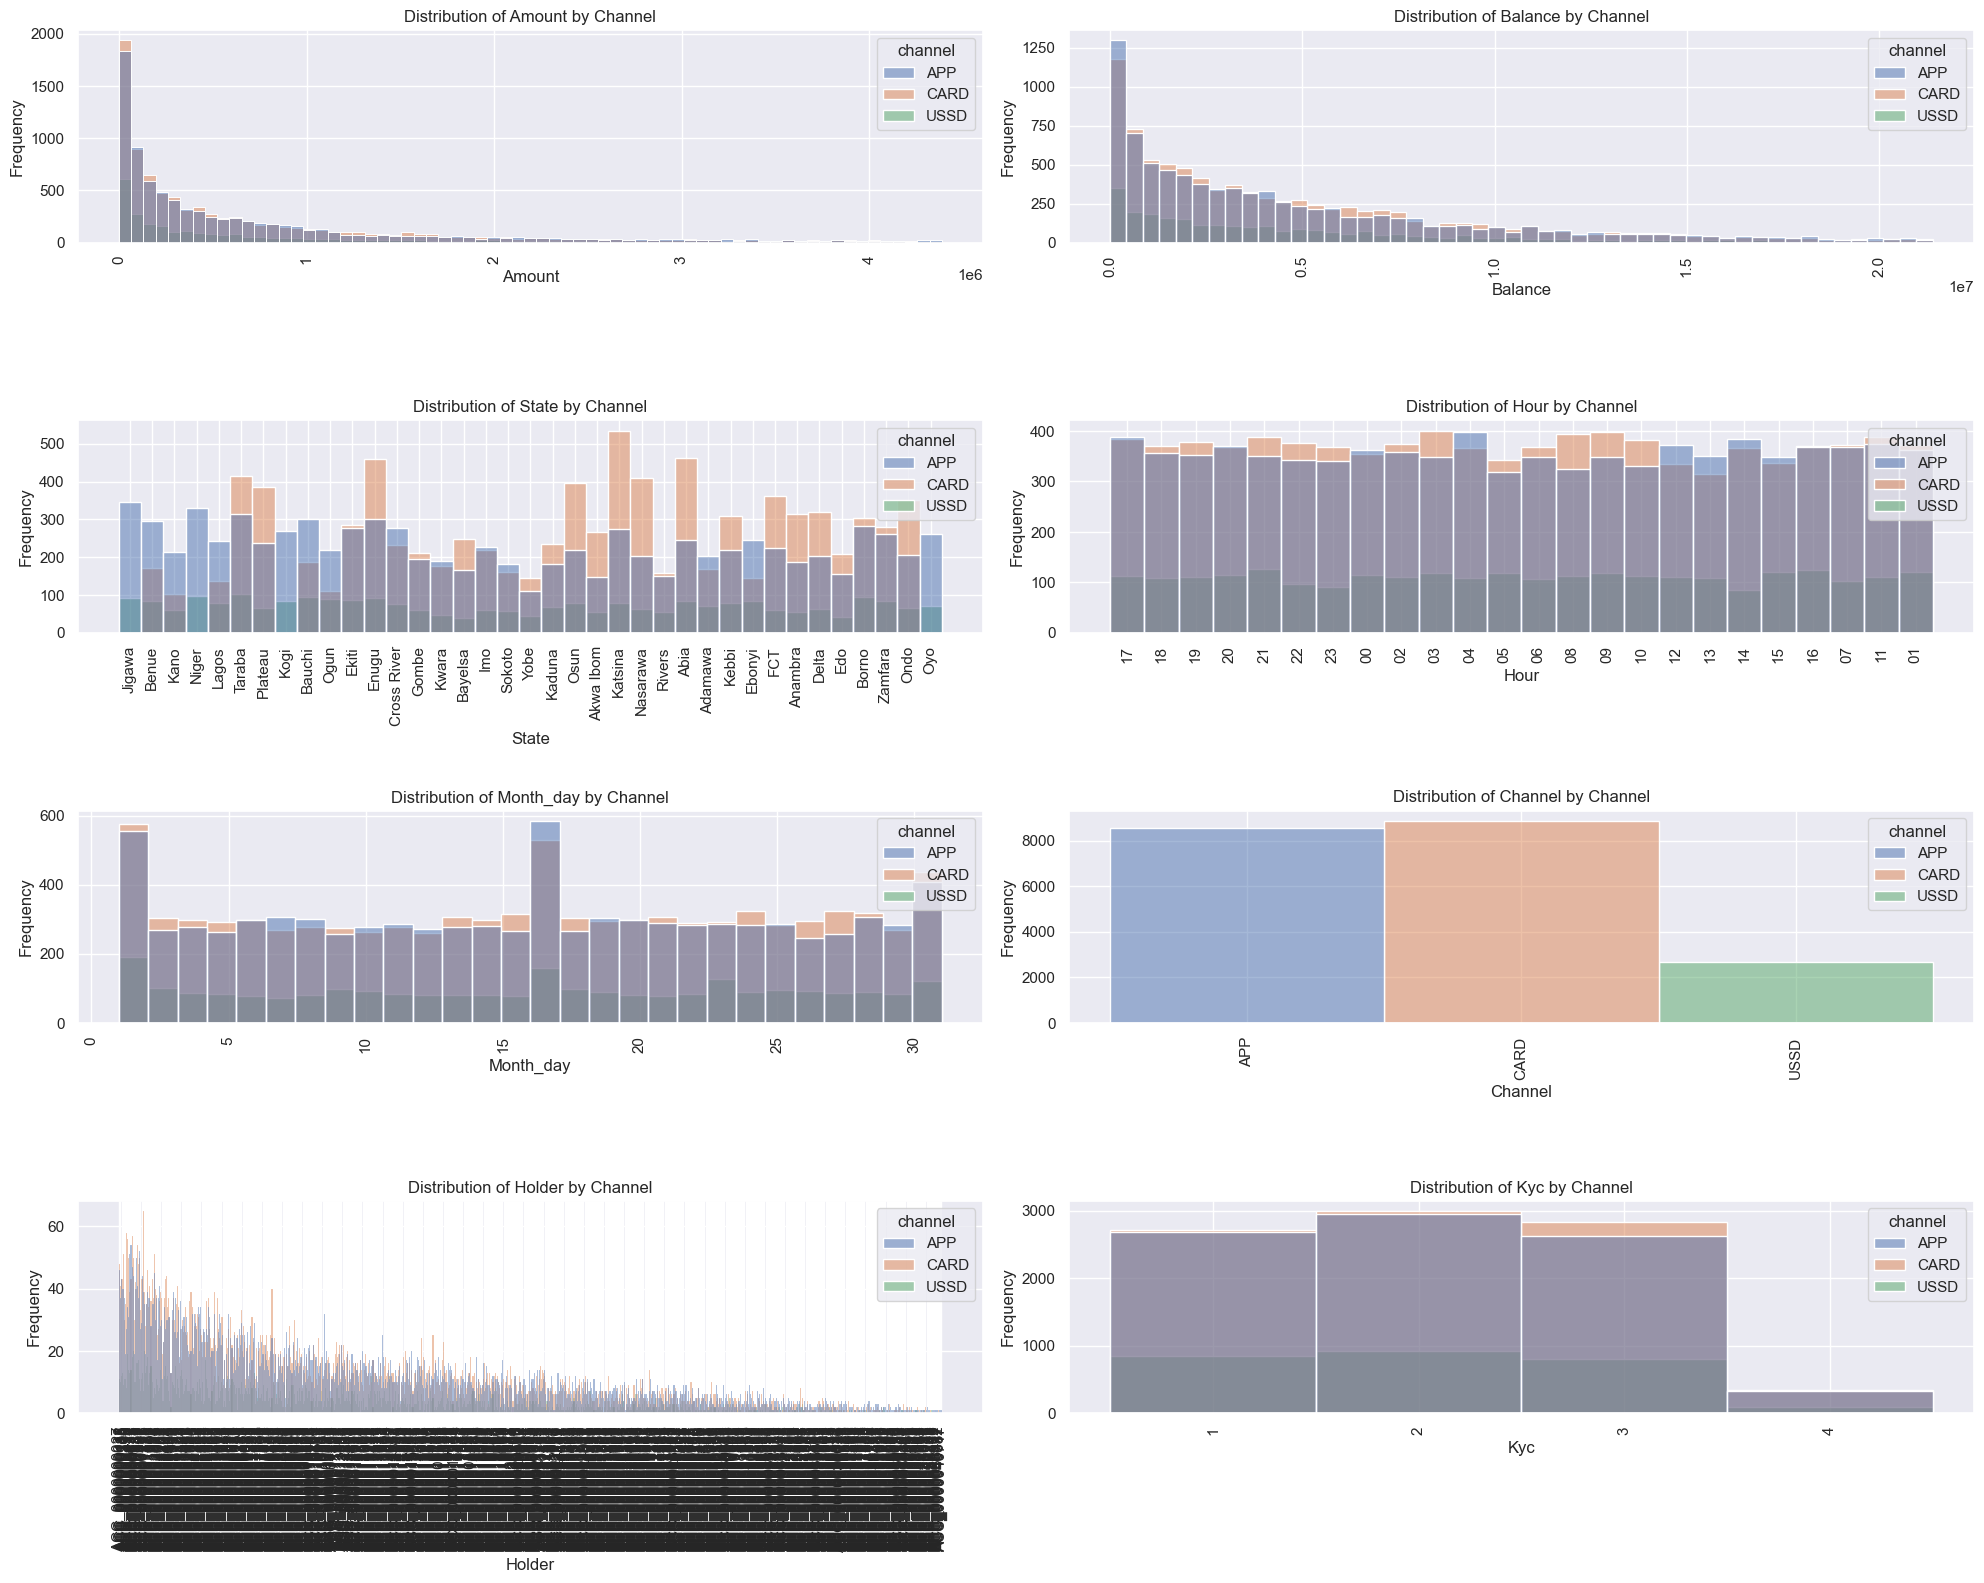

In [106]:
# Plot distribution by category
plt.figure(figsize=(20, 30))
analyst.plot_distribution(df_eda, ['amount', 'balance', 'state', 'hour', 'month_day', 'channel', 'holder', 'kyc'], 'channel')

Observations: 

- Amount/Balance: Lower transaction amounts are most frequent.

- State: Channel usage varies by geographic location. Around half of the states did not use `Card` at all.
    - Yet, card is the most used channel by far accross all features.
    - Why?

- Hour: Activity levels fluctuate throughout the day for each channel.

- Month Day: Usage patterns differ across days of the month.

- Overall Channel Usage: A clear comparison of the total volume handled by each channel.

- Holder: Shows how different user relate to specific channels, with Card being the favourite option.

#### Reported Distribution

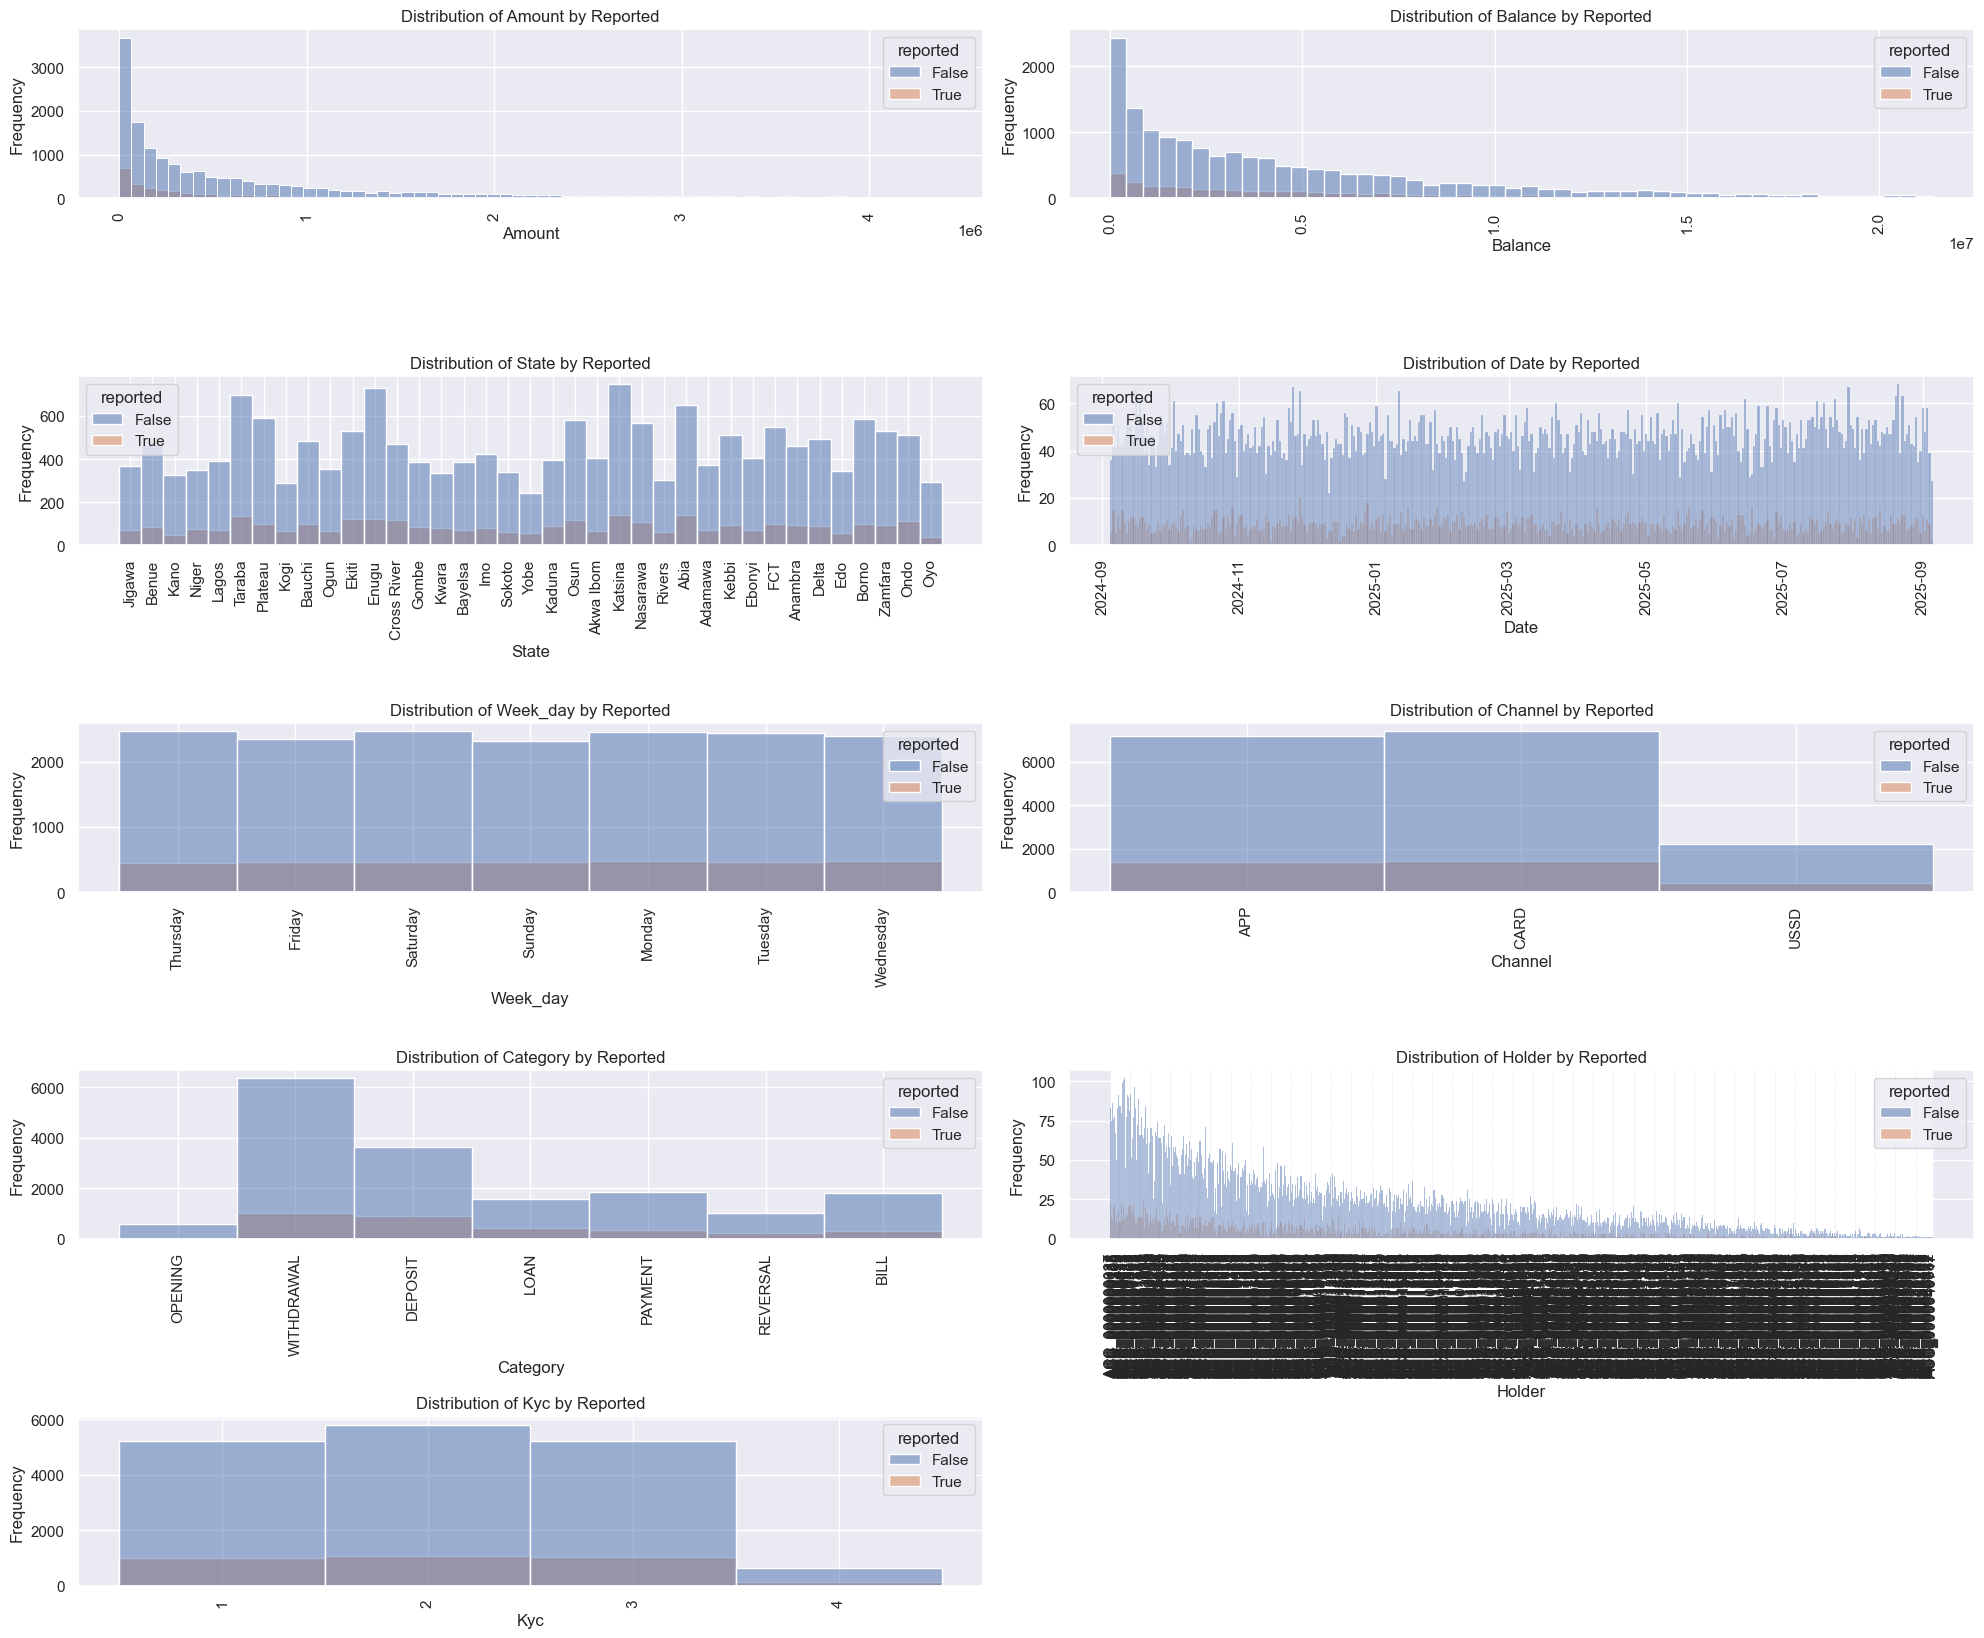

In [107]:
plt.figure(figsize=(20, 30))
analyst.plot_distribution(df_eda, ['amount', 'balance', 'state', 'date', 'week_day', 'channel', 'category', 'holder', 'kyc'], 'reported')

- The majority of transactions involve small amounts, with frequency sharply decreasing as the transaction amount increases.

- Similarly, most account balances are relatively low, with fewer accounts holding large balances.

- "Withdrawal" transactions is significantly more frequent than other categories like "Deposit" or "Payment."

- "Opening" transactions are the least frequent among the displayed categories.

- Transactions are consistently distributed across the week, indicating a similar level of activity throughout the week.

- Mobile banking channels ("Card") appear to be the most frequently used for transactions, followed by "APP" and then "USSD."

- Transaction frequency is relatively low for most account holders, with a few holders showing a higher frequency of transactions.

- The frequency of transactions over date shows fluctuations but no clear, strong upward or downward trend across the observed period.

- Certain states like Yobe, Oyo, and Enugu show a higher frequency of transactions compared to others like Ogun or Kaduna.

### Spread of Data

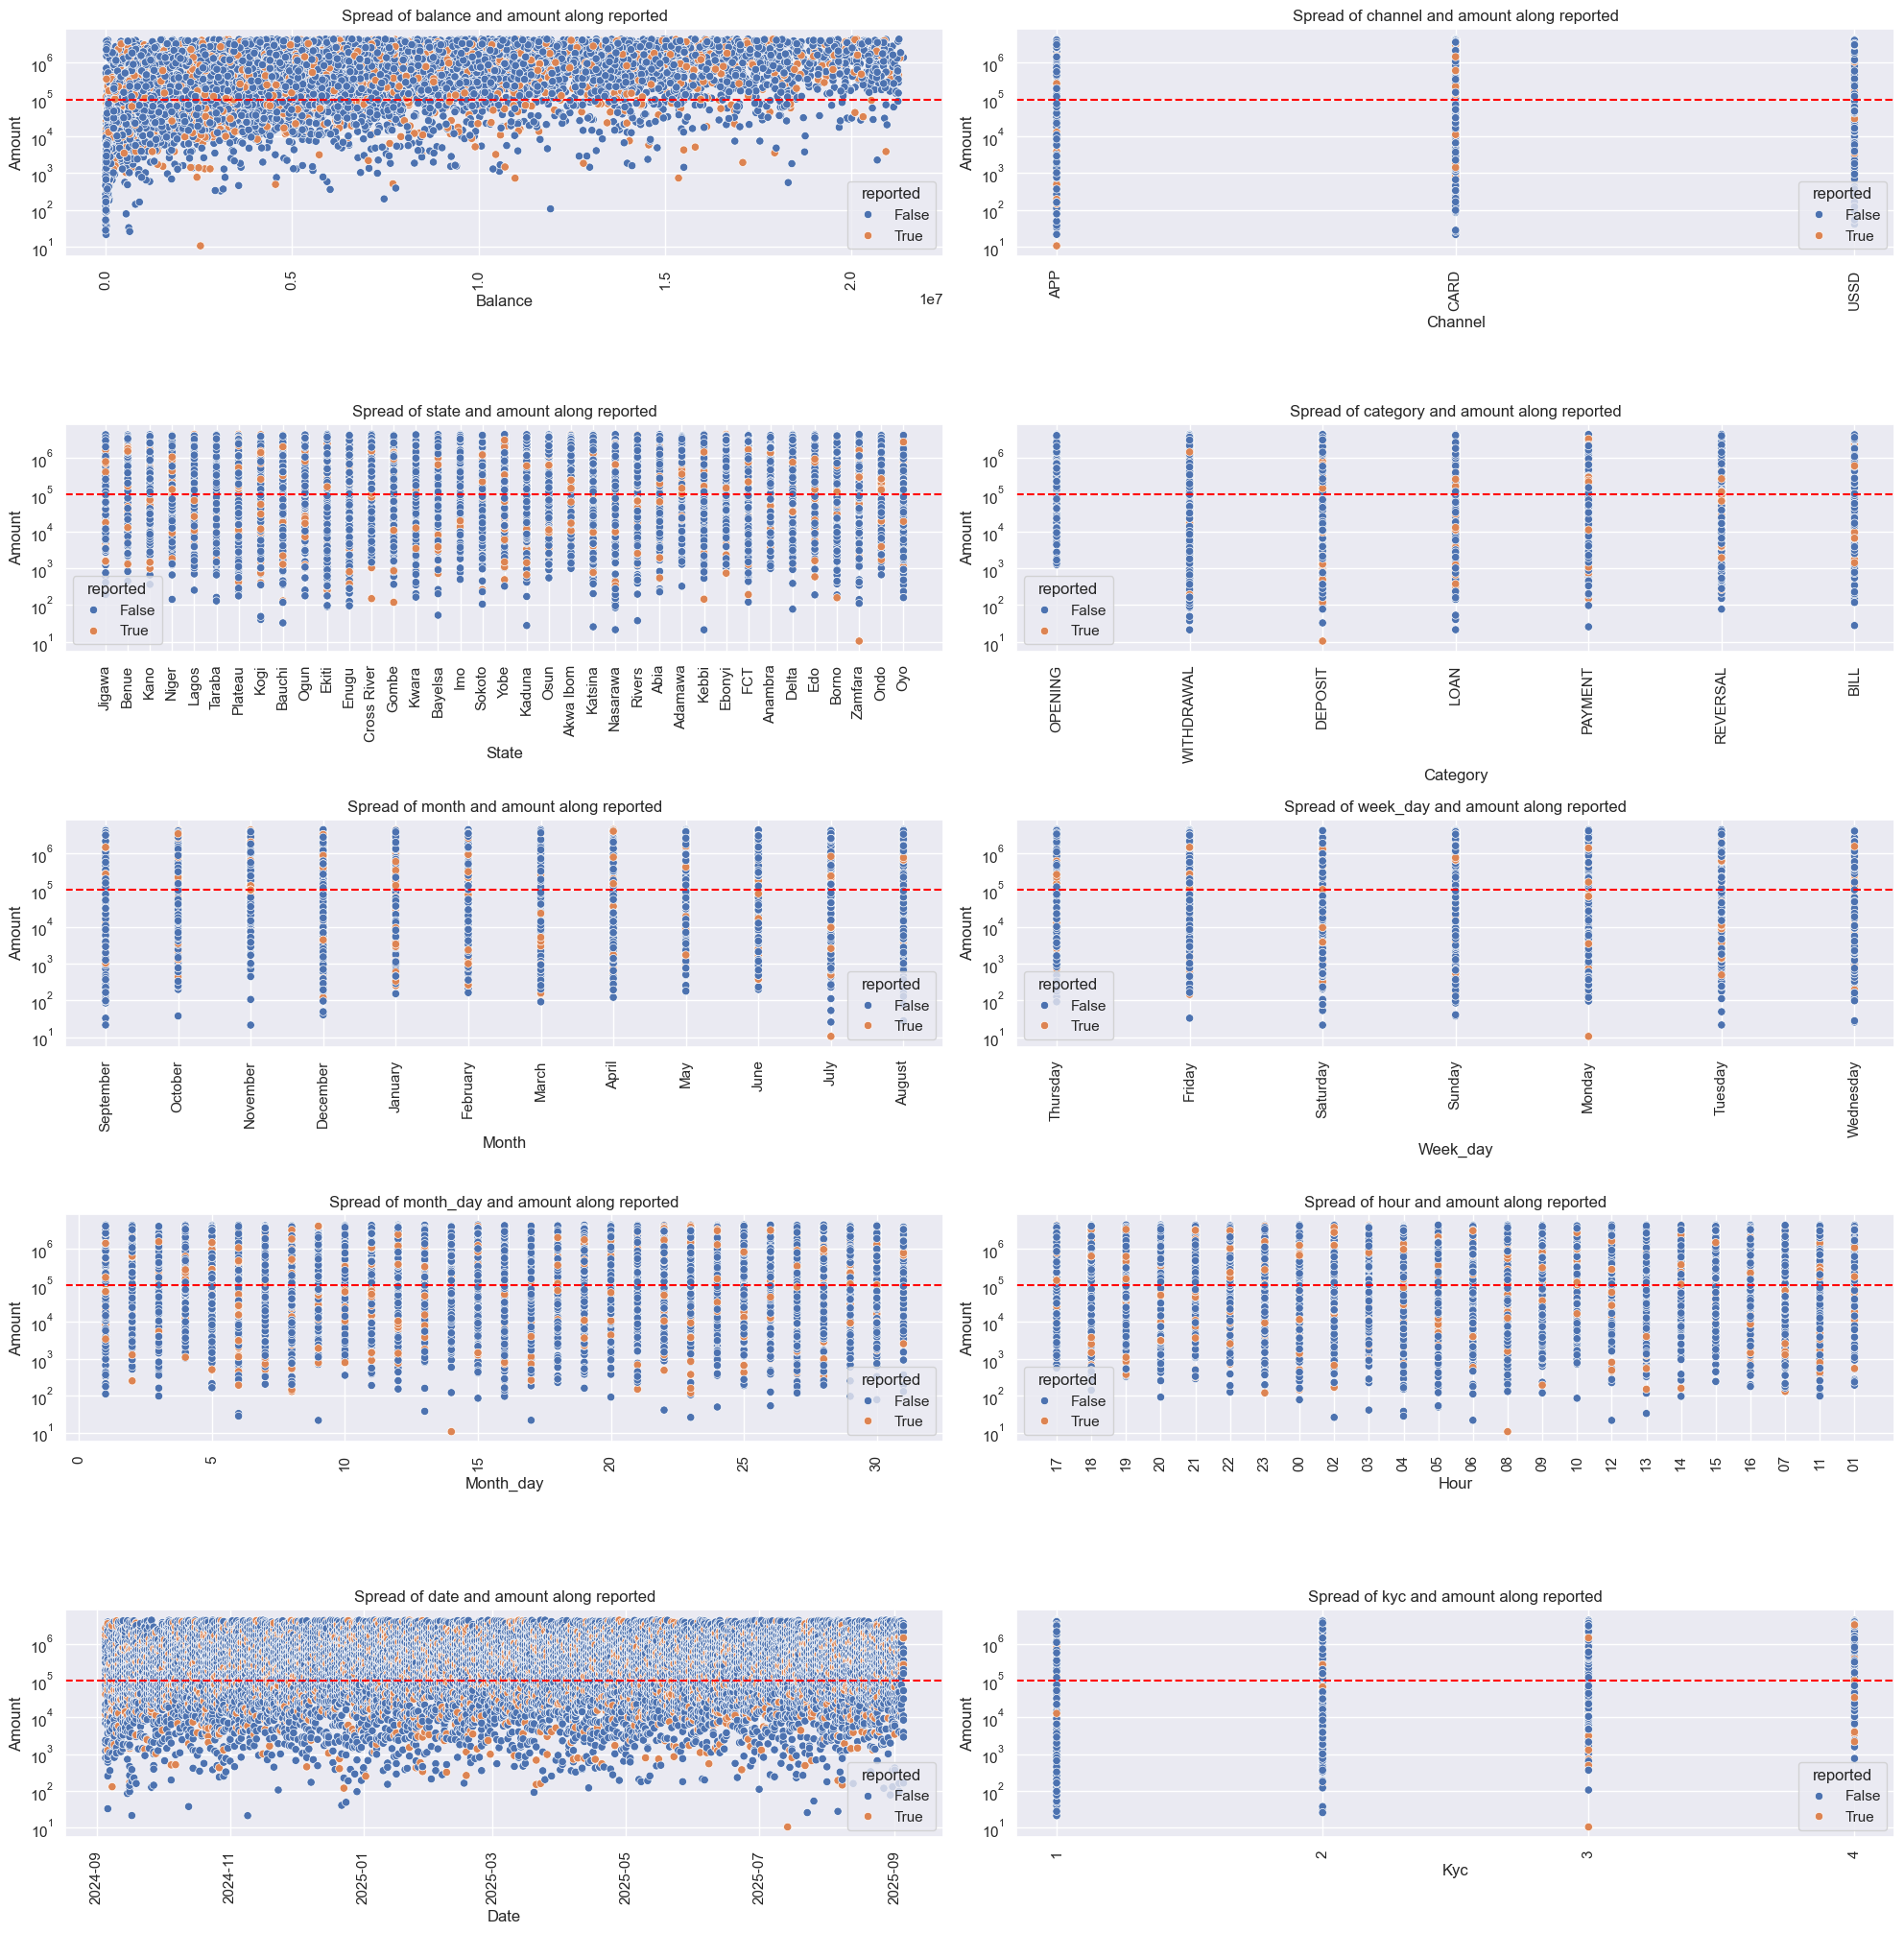

In [108]:
# Visualize the spread of the data
plt.figure(figsize=(20, 40))
analyst.plot_scatter(df_eda, 'amount', ['balance', 'channel', 'state', 'category', 'month', 'week_day', 'month_day', 'hour', 'date', 'kyc'], 'reported', 1e5)

Observations:

- No opening category of transaction was reported

- Level 2 KYC has the least reported transaction

- Transactions are not reported as much on weekends.

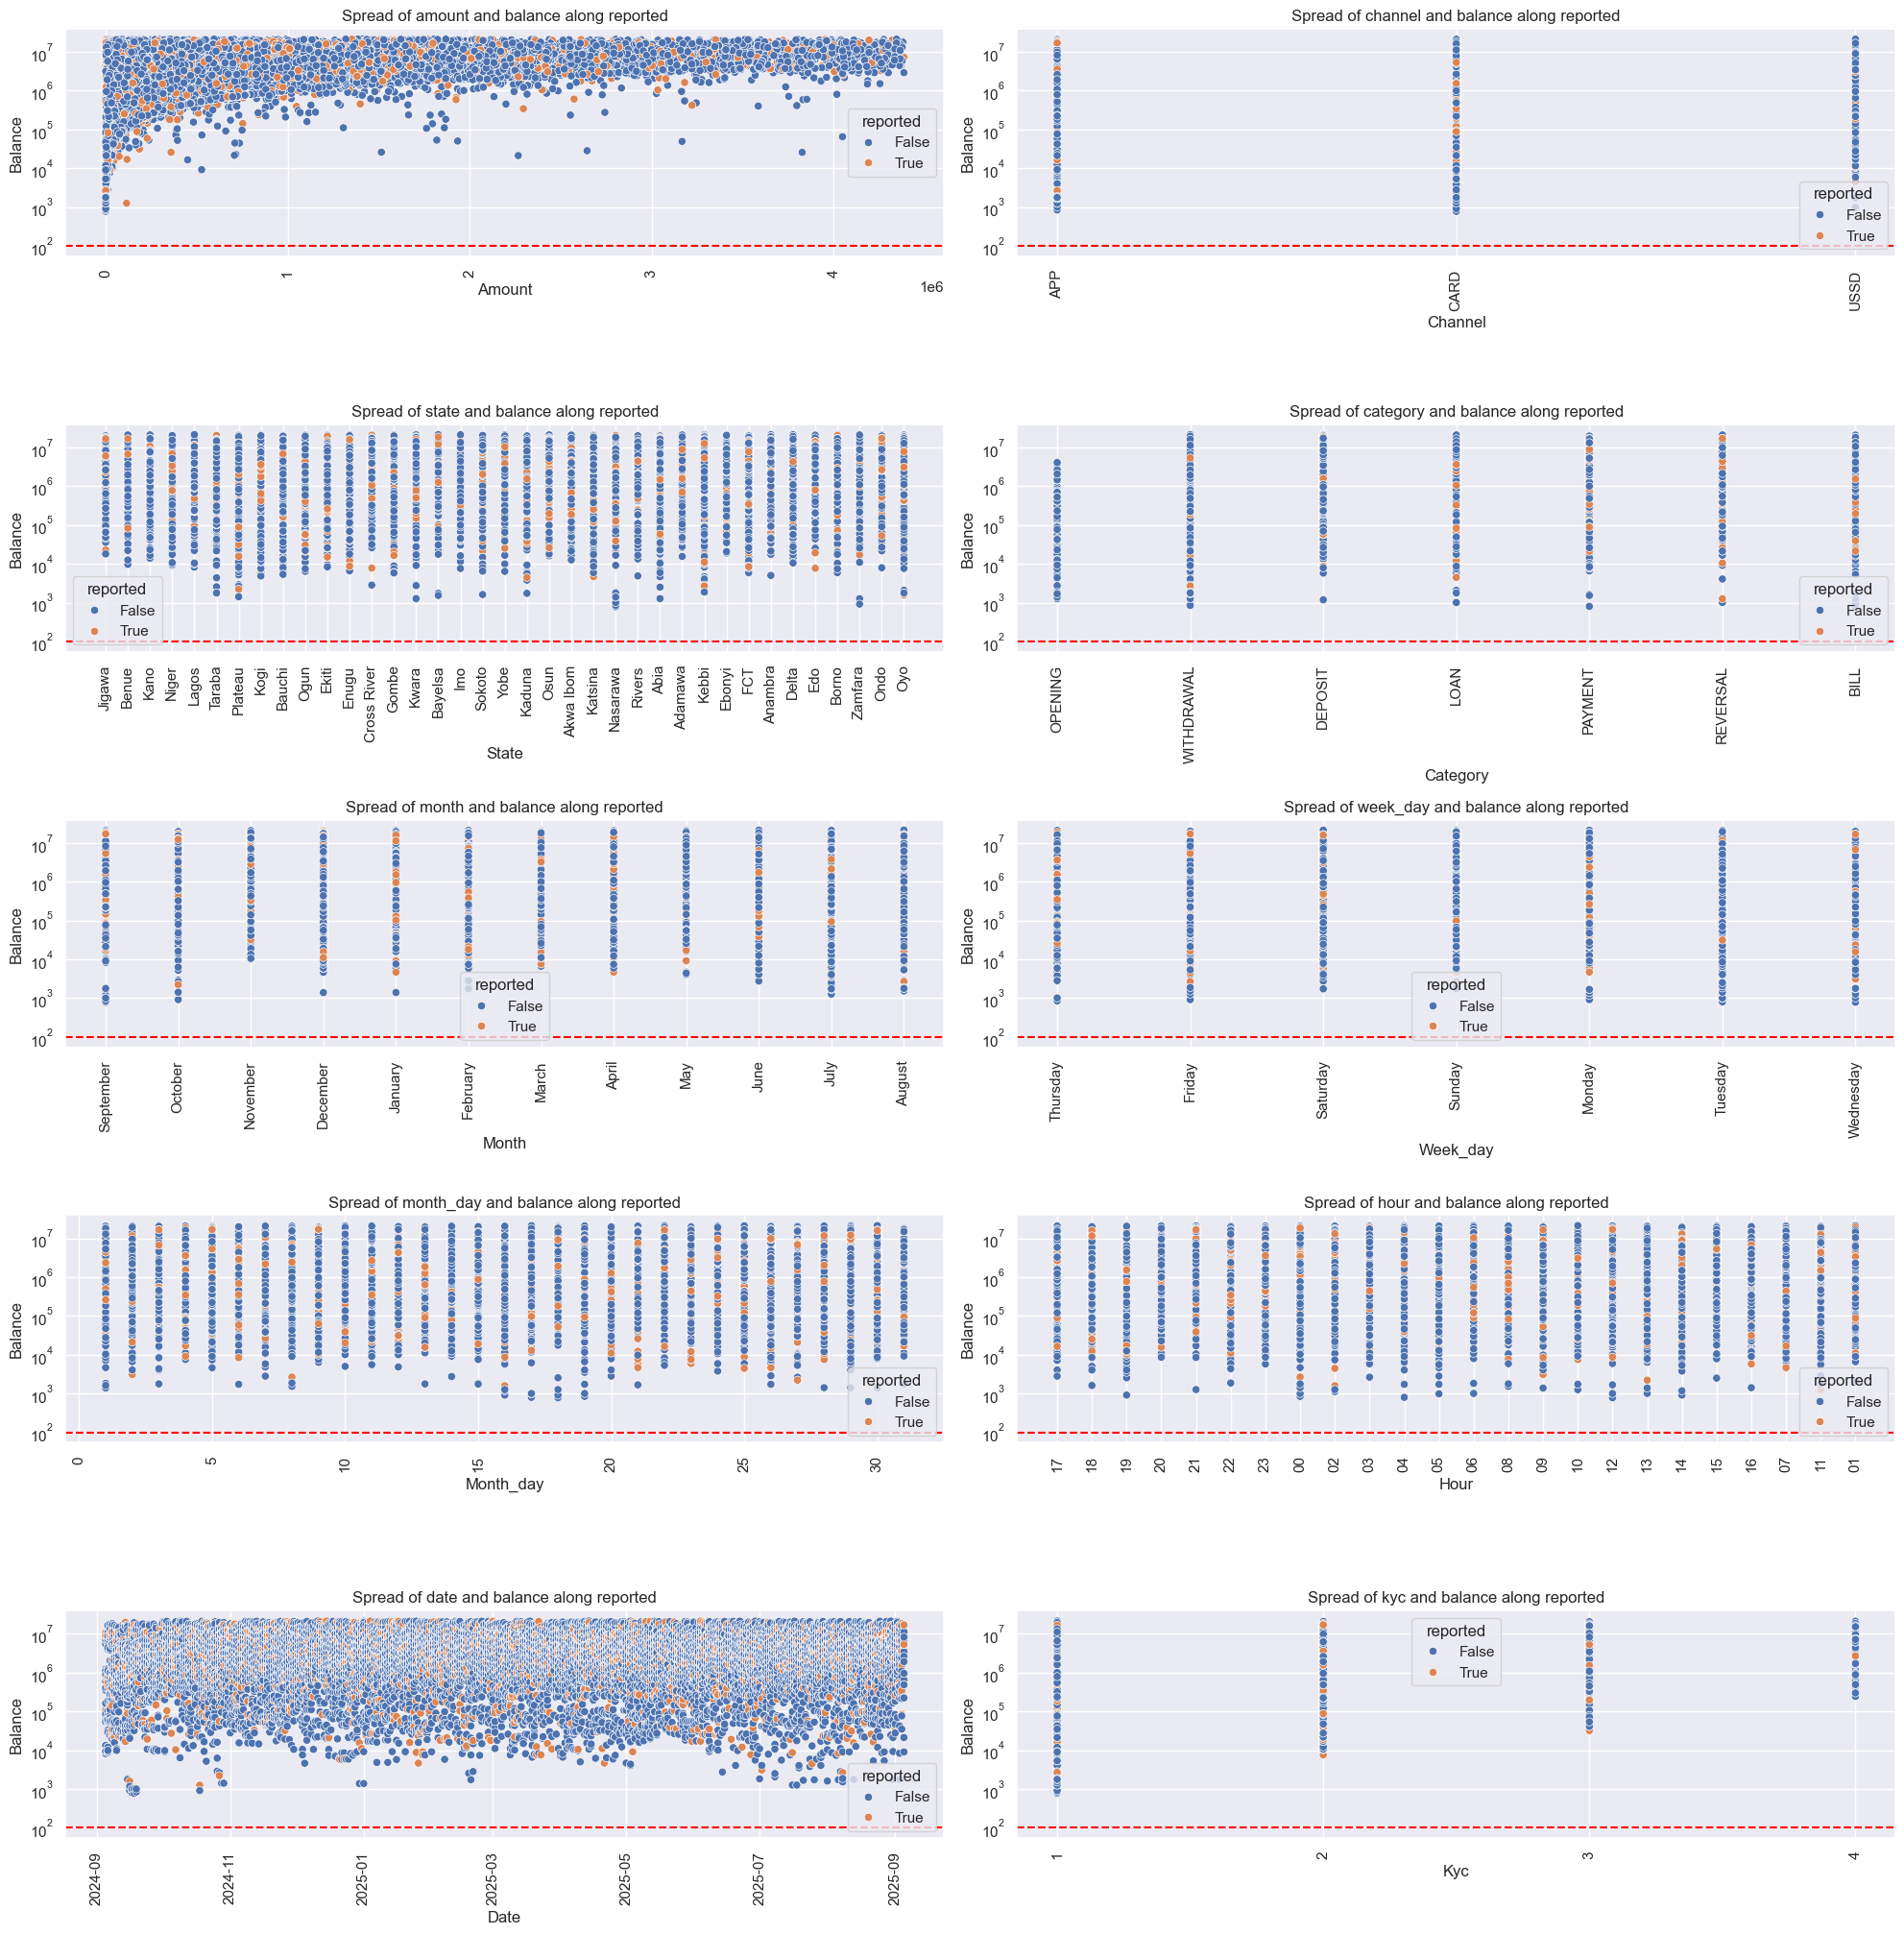

In [109]:
plt.figure(figsize=(20, 40))
analyst.plot_scatter(df_eda, 'balance', ['amount', 'channel', 'state', 'category', 'month', 'week_day', 'month_day', 'hour', 'date', 'kyc'], 'reported', 1e2)

Observations:

- There is an even spread of reported transactions accross all the features.

### Trend Analysis

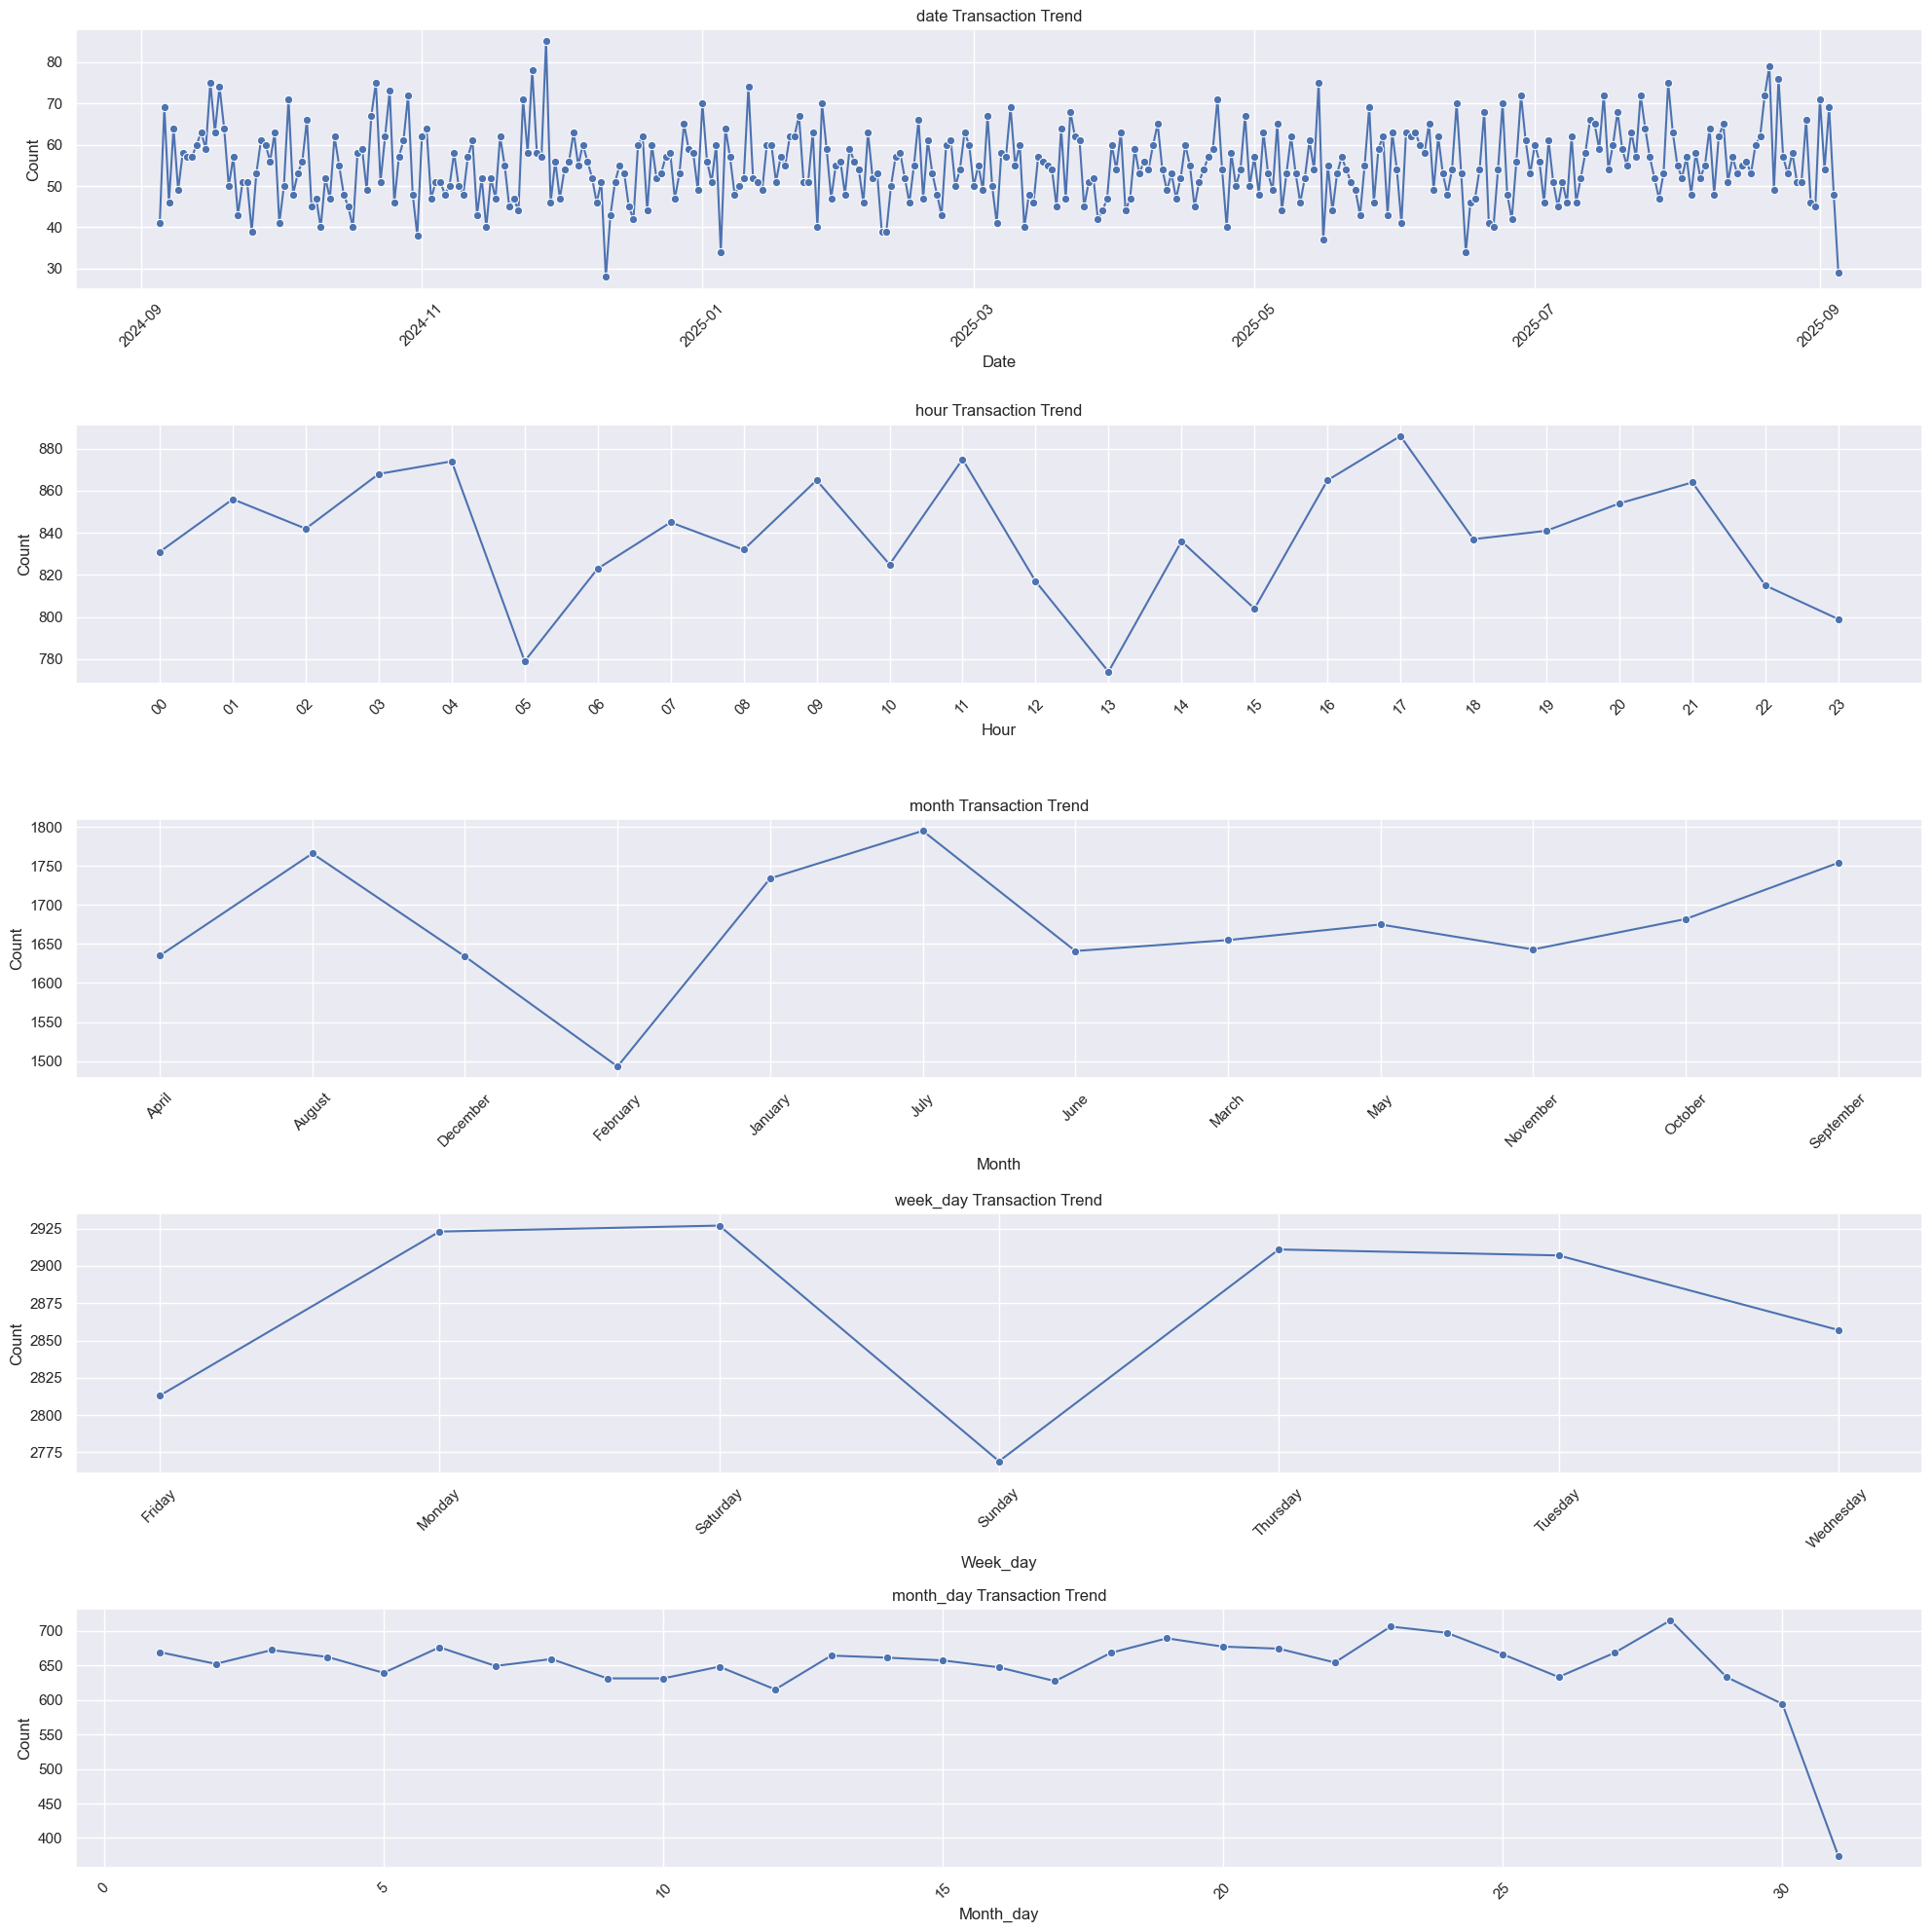

In [110]:
analyst.plot_trend(df_eda, ['date', 'hour', 'month', 'week_day', 'month_day'])

Observations:

- `7am` is the most active of all the hours.
- There is an obvious downwards trend from 9pm to 2am. Time for sleep.
- October is a very active month.
- Tuesday is the most active off all days with Monday as the least. 

In [111]:
df_eda.to_csv(f'../datasets/analyzed_transactions.csv', index=False)

## Insights and Findings
    
- Key Patterns
- Anomalies
- Business Insights
- Recommendations


### Key Patterns

- Amount ↔ Balance lockstep: Strong positive correlation; high amounts typically move balances in sync.

- Temporal uniformity: Activity is broadly even by hour/weekday; Q4 is the most active.

- Debit & Withdrawal gravity: Debits dominate; Withdrawals are the most frequent category.

- KYC skew: KYC Level 4 heavily deconcentrated; Lower KYC levels are more frequent.

- Geo concentration: Transactions span 37 states; Yobe/Oyo emerge as volume hot spots.

### Anomalies

- Heavy right-skew: Amount and balance distributions contain many high-end outliers (IQR-trimmed).

- Nonce integrity edge cases: Reversal/transfer pairings must be 1/2/4 events, flag any other counts.

- Cashflow dips: Net outflow pockets (e.g., KYC 1 cohorts) suggest leakage or behavioral anomalies.

- Device/Channel bursts: Localized spikes by device/channel may indicate scripted or bot-like activity.

- Time cliffs: Dips from 9pm to 2am, suggests maybe users are sleeping.

### Business Insights

- Risk concentration at low KYC: Disproportionate activity with low verification = elevated fraud exposure.

- Operational focus states: Yobe/Oyo high volumes merit tailored limits and monitoring rules.

- Channel strategy: CARD drives withdrawals; APP steady for everyday use—tune controls per channel.

- Seasonal prep: Q4 lift implies staffing, limits, and model recalibration ahead of peak months.

- Sparse “reported” labels: Supervised models will be label-starved; lean on anomaly/PU learning.

### Recommendations

- Tiered limits by KYC: Stricter per-txn/day caps and velocity rules for KYC 1,3 and 4; relax for 2.

- Nonce policy checks: Enforce 1/2/4-event schemas; auto flag any nonce with unexpected counts.

- Adaptive outlier bounds: Maintain IQR based caps per state/channel/hour; update weekly.

- Behavioral features: Add rolling velocity, peer group z-scores, and device consistency signals.

- Modeling stack: Use Isolation Forest for prefiltering → Logistic Regression/XGBoost on flagged sets.

- Hotspot playbooks: For Yobe/Oyo, deploy tighter ATM/POS withdrawal thresholds + step-up KYC.

- Explainability & feedback: SHAP for triage; analyst feedback loops to enrich “reported” labels.

- Real-time guardrails: Rule combos (large amount × new device × late hour × cross-state) = hard blocks.